# Python Spotify project 

- Automating the creation of playlists!

In [56]:
import configparser

In [57]:
## create instance 
config = configparser.ConfigParser()
config.read('congif.ini')
## read the confi details
client_id = config['spotify']['client_id'] ## unique identifier for the app -- tells spotify who is making the request 
client_secret = config['spotify']['client_secret']## secret key by spotify for authentication purposes 
redirect_url = config['spotify']['redirect_url']

In [58]:
print(client_id)
print(redirect_url)

2e34ee32bd174dfd99af23aad888a216
http://localhost:8888/callback


Python package for spotify: Spotipy
- for generating playlist on the platform


In [59]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

In [60]:
scope = "playlist-read-private user-read-playback-state user-modify-playback-state user-read-currently-playing"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=redirect_url,
    scope=scope
))

## test to see if works 
try: 
    current_user = sp.current_user()
    print(f'Success: current user: {current_user["display_name"]}')
except spotipy.exceptions.SpotifyException as e:
    print(f'Error: Spotify Exception : {e}')
    print(f'{e.reason}')

Success: current user: Ian Petrus Tan


# My current no.1 playlist: insights

![Screenshot 2024-07-15 at 3.48.32 PM.png](<attachment:Screenshot 2024-07-15 at 3.48.32 PM.png>)
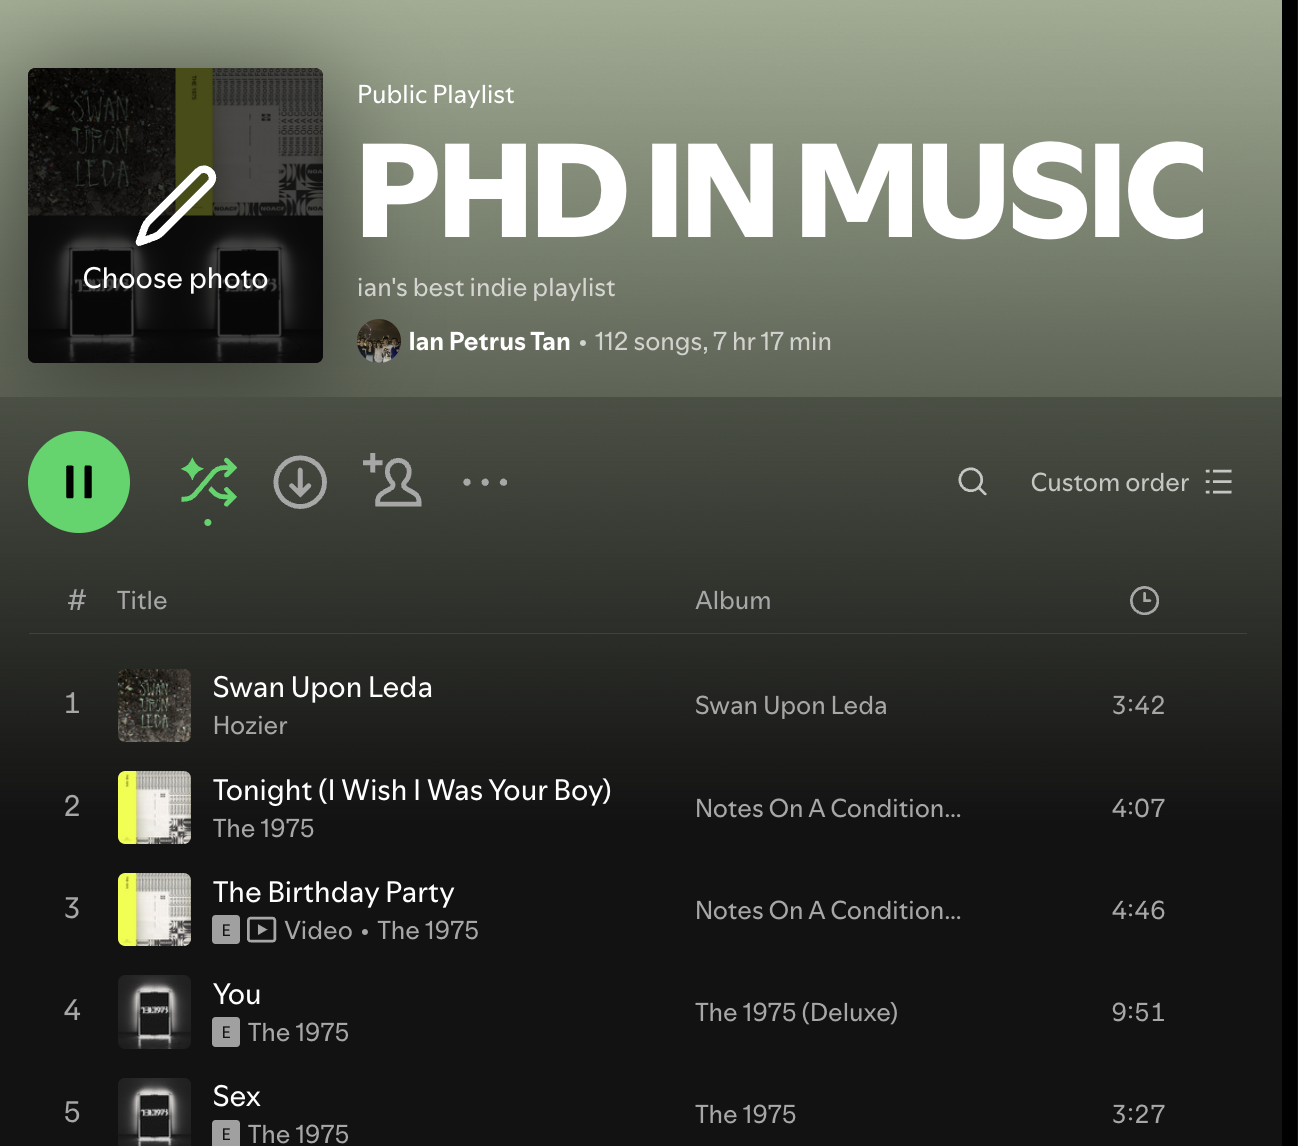

In [61]:
## use function to RETRIEVE USER PLAYLISTS
all_playlists = sp.current_user_playlists(limit = 10)
print(type(all_playlists))
all_names = [playlist['name'] for playlist in all_playlists['items']]

## get id for playlist text
for playlist in all_playlists['items']:
    if 'phd in music'.lower() in playlist['name'].lower():
        print(f"{playlist['name']} Found: ID = {playlist['id']}")

## Using a text search to get playlist id 
def get_playlist_id(playlist_name_text):
    all_playlists = sp.current_user_playlists()
    for playlist in all_playlists['items']:
        if 'phd in music'.lower() in playlist['name'].lower():
            print(f"{playlist['name']} Found: ID = {playlist['id']}")
            return(playlist['id'])

## After using api to get track list from a playlist
def get_songs_from_json(songs):
    track_info = []
    tracks = songs['items']
    for track_item in tracks:
        track = track_item['track']
        track_info.append({
            'track_name': track['name'],
            'artist_name': track['artists'][0]['name'], ## have to go one layer deeper 
            'album_name': track['album']['name'],
            'release_date': track['album']['release_date'],
            'song_popularity': track['popularity'],
            'artist_id': track['artists'][0]['id']

        })
    return track_info


<class 'dict'>
PHD IN MUSIC Found: ID = 3HR8fzqiphyPz3xHq0u9dG


In [62]:
phd_in_music_id = get_playlist_id('phd in music')

PHD IN MUSIC Found: ID = 3HR8fzqiphyPz3xHq0u9dG


In [63]:
## Get all tracks inside 
all_tracks = sp.playlist_tracks(phd_in_music_id)
all_tracks_titles = [song['track']['name'] for song in all_tracks['items']]
print(f'Current number of songs: {len(all_tracks_titles)}')

Current number of songs: 100


## Insights

In [64]:
all_tracks.keys()
len(all_tracks['items'])

100

In [65]:
track_items = all_tracks['items']
track_items[0]['track'].keys()



dict_keys(['preview_url', 'available_markets', 'explicit', 'type', 'episode', 'track', 'album', 'artists', 'disc_number', 'track_number', 'duration_ms', 'external_ids', 'external_urls', 'href', 'id', 'name', 'popularity', 'uri', 'is_local'])

Retrieve songs from playlist

In [66]:
## get all tracks from the playlist
results = sp.playlist_tracks(phd_in_music_id)
phd_track_info = get_songs_from_json(results)

tracks = results['items']
# track_info = []
# ## iterate through the tracks
# for item in tracks:
#     track = item['track']
#     track_info.append({
#         'track_name': track['name'],
#         'artist_name': track['artists'][0]['name'], ## have to go one layer deeper 
#         'album_name': track['album']['name'],
#         'release_date': track['album']['release_date'],
#         'song_popularity': track['popularity'],
#         'artist_id': track['artists'][0]['id']
#     })

In [67]:
import pandas as pd
phd_in_music_df = pd.DataFrame(phd_track_info)
phd_in_music_df['genre'] = [sp.artist(artist)['genres'] for artist in phd_in_music_df.artist_id]
phd_in_music_df.head()

track_name artist_name                   album_name  \
0                   Swan Upon Leda      Hozier               Swan Upon Leda   
1  Tonight (I Wish I Was Your Boy)    The 1975  Notes On A Conditional Form   
2               The Birthday Party    The 1975  Notes On A Conditional Form   
3                              You    The 1975            The 1975 (Deluxe)   
4                              Sex    The 1975                     The 1975   

  release_date  song_popularity               artist_id  \
0   2022-10-07               56  2FXC3k01G6Gw61bmprjgqS   
1   2020-05-22               52  3mIj9lX2MWuHmhNCA7LSCW   
2   2020-05-22               50  3mIj9lX2MWuHmhNCA7LSCW   
3   2013-09-02               45  3mIj9lX2MWuHmhNCA7LSCW   
4   2013-01-01               59  3mIj9lX2MWuHmhNCA7LSCW   

                                               genre  
0  [irish singer-songwriter, modern rock, pop, po...  
1  [modern alternative rock, modern rock, pop, po...  
2  [modern alternative rock, modern rock, pop, po...  
3  [modern alternative rock, modern rock, pop, po...  
4  [modern alternative rock, modern rock, pop, po...

Genres not appearing -- try different method (try request from scratch)

### Genres

In [68]:
from collections import Counter
import requests

#### Try different method

In [69]:
auth_url = 'https://accounts.spotify.com/api/token'
auth_response = requests.post(auth_url, {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
})

## save the response data to json
auth_response_data = auth_response.json()

## save access token
access_token = auth_response_data['access_token']

headers = {'Authorization': 'Bearer {token}'.format(token=access_token)}


In [71]:
import requests
BASE_URL = 'https://api.spotify.com/v1/'

## first get track uris 
genre_list = []

for track in tracks:
    track_uri = (track['track']['uri'])
    track_uri = track_uri.split(':')[-1]
    r = requests.get(BASE_URL+'tracks/' + track_uri, headers= headers)
    r = r.json()
    a_uri = r['artists'][0]['uri'].split(':')[2]
    
    s = requests.get(BASE_URL + 'artists/' + a_uri, headers=headers)
    s = s.json()
    genre_list.append(s['genres'])



In [72]:
## add genres back into df 
phd_in_music_df['genres'] = genre_list

# Saving checkpoint --------------

In [ ]:
## saving checkpoint 
import os
checkpoint_path = './checkpoints'
checkpoint_file_path = os.path.join(checkpoint_path, 'ian_playlist_data_phdinmusic.csv')
# ## Create folder if does not exist
# os.makedirs(checkpoint_path, exist_ok=True) ## only create if does not exist via exist_ok

# ## SAVE AND READ 
# phd_in_music_df.to_csv(checkpoint_file_path, 
#                        index=False)

import pandas as pd
phd_in_music_df = pd.read_csv(checkpoint_file_path)

# Saving checkpoint --------------

In [ ]:
all_genres = [genre for entry in phd_in_music_df.genres for genre in entry]
genre_counter = Counter(all_genres)
genre_counter_df = pd.DataFrame(genre_counter.items(), columns= ['genre', 'count']).sort_values('count', ascending=False)

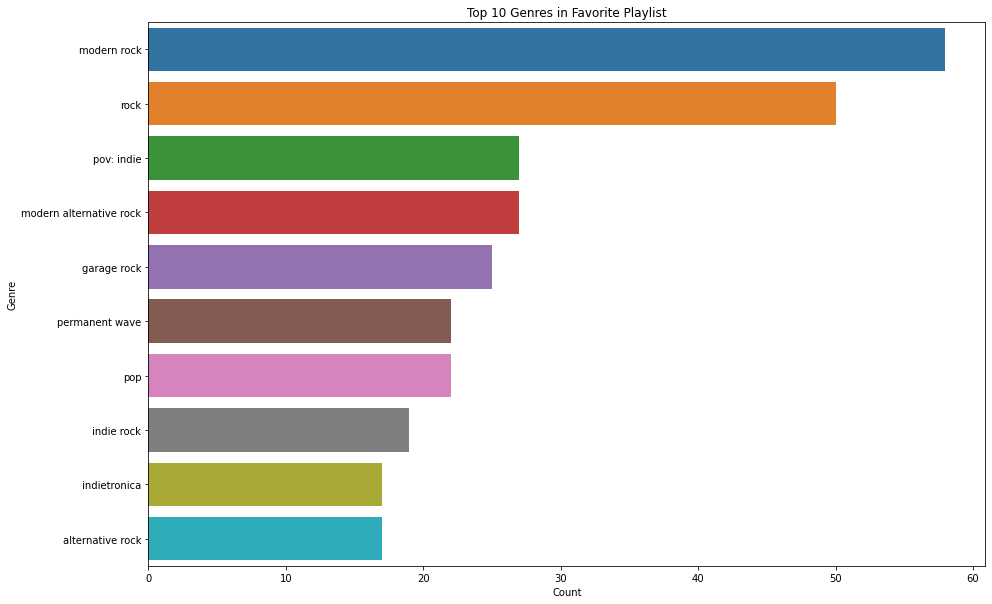

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.barplot(x='count', y='genre', data=genre_counter_df.sort_values(by='count', ascending=False).head(10))
plt.title('Top 10 Genres in Favorite Playlist')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


### Artists

In [ ]:
artists_counter = Counter(phd_in_music_df.artist_name)
artists_counter_df = pd.DataFrame(artists_counter.items(), columns=['artists', 'count']).sort_values('count', ascending=False).reset_index(drop=True)
artists_counter_df.head()

artists  count
0                  The 1975     16
1               The Strokes     13
2                Royel Otis      8
3            Arctic Monkeys      8
4  Unknown Mortal Orchestra      7

In [ ]:
isinstance(artists_counter, dict)

True

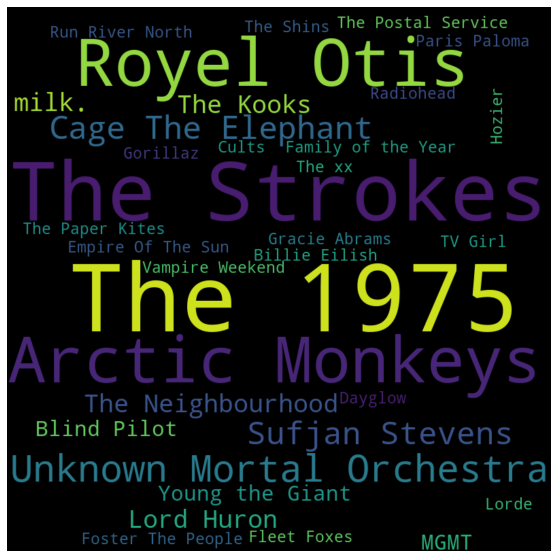

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(height= 800, width=800)
wordcloud.generate_from_frequencies(frequencies=artists_counter)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### By popularity 

In [ ]:
phd_artists = phd_in_music_df.artist_name.unique()
phd_artists_id = phd_in_music_df.artist_id.unique()
phd_artists_popularity = [sp.artist(phd_artist)['popularity'] for phd_artist in phd_artists_id]

In [ ]:
artists_df = pd.DataFrame({'artists':phd_artists, 'artist_popularity':phd_artists_popularity}).sort_values('artist_popularity', ascending=False)
artists_df_combined = artists_df.merge(artists_counter_df).set_index('artists')
artists_df_combined.head()

artist_popularity  count
artists                                    
Billie Eilish                     94      1
Hozier                            85      1
Arctic Monkeys                    85      8
The Neighbourhood                 83      3
Gracie Abrams                     82      1

Text(0.5, 0, 'Spotify popularity ')

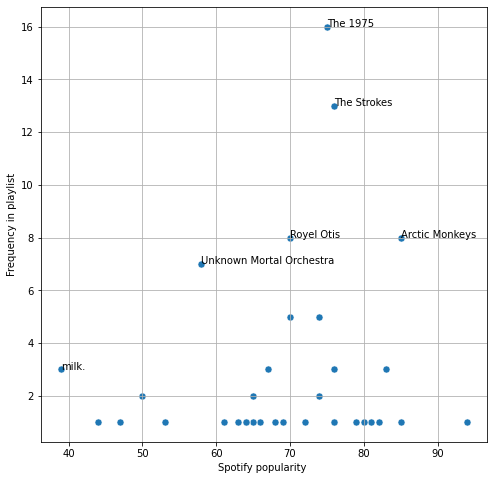

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = artists_df_combined, x = 'artist_popularity', y = 'count',
                s =50)
top_artists_count = artists_df_combined.nlargest(5, 'count')## my two favourite artists
bottom_artists_pop = artists_df_combined.nsmallest(1, 'artist_popularity')## my two favourite artists

for i, row in pd.concat([top_artists_count, bottom_artists_pop]).iterrows():
    plt.annotate(i, ## annotate the text of the name -- use index since we had set index
                 (row['artist_popularity'], row['count']))
plt.grid(True)
plt.ylabel('Frequency in playlist')
plt.xlabel('Spotify popularity ')

In [ ]:
artists_song_pop_avg = phd_in_music_df.groupby('artist_name')['song_popularity'].mean()
artists_df_combined['playlist_avg_popularity'] = artists_song_pop_avg

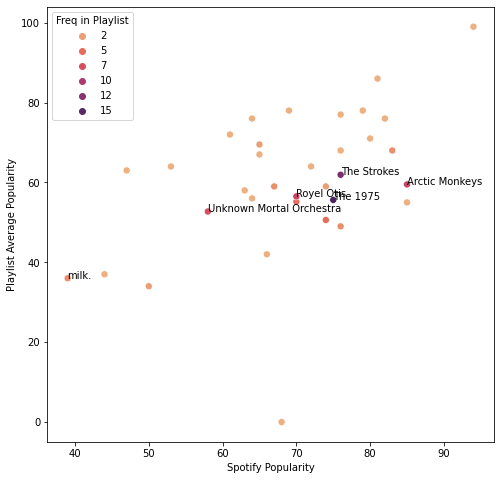

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = artists_df_combined, x = 'artist_popularity', 
                y = 'playlist_avg_popularity',
                hue ='count', s = 50, palette='flare')
for i, row in pd.concat([top_artists_count, bottom_artists_pop]).iterrows():
    plt.annotate(i, ## annotate the text of the name -- use index since we had set index
                 (row['artist_popularity'], row['playlist_avg_popularity']))

plt.ylabel('Playlist Average Popularity')
plt.xlabel('Spotify Popularity')
plt.legend(title = 'Freq in Playlist')

plt.show()

## All songs

Index(['The 1975', 'The Strokes', 'Royel Otis', 'Arctic Monkeys',
       'Unknown Mortal Orchestra'],
      dtype='object', name='artist_name')


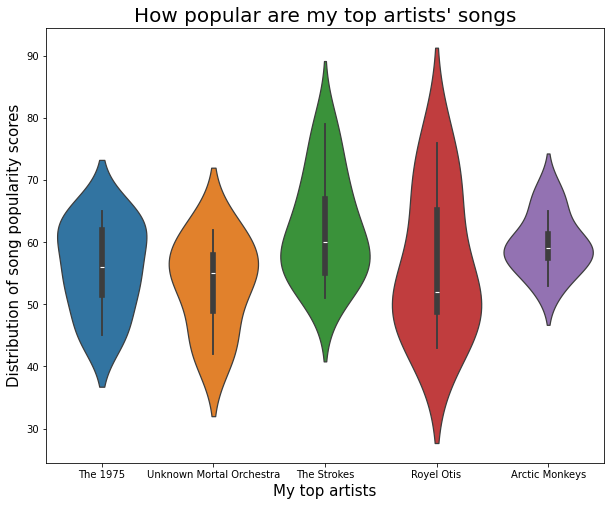

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
## Filter for artists with at least 10 songs 
significant_artists = phd_in_music_df.artist_name.value_counts().index[phd_in_music_df.artist_name.value_counts() > 5]
print(significant_artists)

plt.figure(figsize=(10,8))
sns.violinplot(data = phd_in_music_df[phd_in_music_df.artist_name.isin(significant_artists)], 
              x = 'artist_name',
              hue = 'artist_name',
              y = 'song_popularity')
plt.xlabel('My top artists', fontsize = 15)
plt.ylabel('Distribution of song popularity scores', fontsize = 15)
plt.title("How popular are my top artists' songs", fontsize = 20)
plt.show()

# Visualising my kind of music - track features

We can visualise or quantify the music in terms of features such as tempo, acousticness, energy, liveness, valence. The definition, taken from the [spotify documentation](https://developer.spotify.com/documentation/web-api/reference/get-audio-features), are the following: 

* danceability: based on a combination of elements such as tempo, rhythm stability, beat strength, overall regularity, such that the music becomes suitable for *dancing*
* energy: perceptual measure of intensity and activity, i.e. how fast, loud, noisy a song is. e.g. classical music like Bach would rank low on this while death metal would be high 
* liveness: whether the song was recorded live 
* tempo: the overall tempo i.e. the number of beats per min (BPM) - higher BPM helps with exercise. 
* valence: how cheerful/positive the song is, as opposed to sad or negative

In [ ]:
## testing 
sample_track_id = tracks[0]['track']['id']
sp.audio_features(sample_track_id)[0].keys()

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [ ]:
## Get audio features from list of songs id 
def get_audio_features(tracks):
    list_of_dicts_song_features = []
    for item in tracks:
        track_id = (item['track']['id'])
        ## call sp.audio_features function
        audio_features = sp.audio_features(track_id)[0]
        audio_features['song'] = item['track']['name']
        audio_features['artist'] = item['track']['artists'][0]['name']
        list_of_dicts_song_features.append(audio_features)
    return pd.DataFrame(list_of_dicts_song_features)


In [ ]:
## Run a for loop that calls the spotipy funciton to get audio features of each song 
music_features = get_audio_features(tracks)

In [ ]:
# music_features = pd.DataFrame(list_of_dicts_song_features)
music_features.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.351  0.4100    2    -8.660     1       0.0327      0.494000   
1         0.478  0.4560    7    -6.844     1       0.0529      0.122000   
2         0.627  0.4950    2    -8.934     1       0.0287      0.068100   
3         0.215  0.0132    0    -6.102     1       0.0567      0.006620   
4         0.410  0.9740    2    -4.139     1       0.1250      0.000013   

   instrumentalness  liveness  valence    tempo            type  \
0          0.440000     0.131    0.129  125.995  audio_features   
1          0.000020     0.214    0.268  171.900  audio_features   
2          0.104000     0.124    0.452  134.010  audio_features   
3          0.004130     0.159    0.966  137.960  audio_features   
4          0.000049     0.526    0.173  148.298  audio_features   

                       id                                   uri  \
0  3JtVtwLYCy9WXcHLQyzRnl  spotify:track:3JtVtwLYCy9WXcHLQyzRnl   
1  7DmTaJoM7L020qm3egqNsM  spotify:track:7DmTaJoM7L020qm3egqNsM   
2  3wFPsw1WQJevCFoKpoLyTF  spotify:track:3wFPsw1WQJevCFoKpoLyTF   
3  1vrXDFIfPVfDOH2rM7gFnc  spotify:track:1vrXDFIfPVfDOH2rM7gFnc   
4  67ispalOAo3jnZWYSTTfZk  spotify:track:67ispalOAo3jnZWYSTTfZk   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/3JtVtwLYCy9W...   
1  https://api.spotify.com/v1/tracks/7DmTaJoM7L02...   
2  https://api.spotify.com/v1/tracks/3wFPsw1WQJev...   
3  https://api.spotify.com/v1/tracks/1vrXDFIfPVfD...   
4  https://api.spotify.com/v1/tracks/67ispalOAo3j...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/3JtV...       222026   
1  https://api.spotify.com/v1/audio-analysis/7DmT...       247265   
2  https://api.spotify.com/v1/audio-analysis/3wFP...       285833   
3  https://api.spotify.com/v1/audio-analysis/1vrX...       591160   
4  https://api.spotify.com/v1/audio-analysis/67is...       207002   

   time_signature                             song    artist  
0               4                   Swan Upon Leda    Hozier  
1               4  Tonight (I Wish I Was Your Boy)  The 1975  
2               4               The Birthday Party  The 1975  
3               5                              You  The 1975  
4               4                              Sex  The 1975

In [118]:
## Saving checkpoint 
# music_features.to_csv('checkpoints/playlist_music_features.csv', 
#                       index=False)
import pandas as pd
music_features = pd.read_csv('checkpoints/playlist_music_features.csv')

In [ ]:
music_features.describe()

danceability      energy         key   loudness        mode  \
count    100.000000  100.000000  100.000000  100.00000  100.000000   
mean       0.556890    0.669362    5.160000   -6.98552    0.810000   
std        0.157369    0.219760    3.670026    3.25544    0.394277   
min        0.174000    0.013200    0.000000  -20.69600    0.000000   
25%        0.462750    0.499500    2.000000   -8.27375    1.000000   
50%        0.544000    0.721000    5.000000   -6.09500    1.000000   
75%        0.660500    0.875000    8.250000   -4.99600    1.000000   
max        0.956000    0.974000   11.000000   -0.73400    1.000000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   100.000000    100.000000        100.000000  100.000000  100.000000   
mean      0.044031      0.221516          0.187775    0.156146    0.499500   
std       0.019464      0.295493          0.286786    0.100508    0.241075   
min       0.024200      0.000002          0.000000    0.029900    0.039800   
25%       0.031650      0.005910          0.000144    0.094675    0.307250   
50%       0.037650      0.055200          0.019800    0.118000    0.523000   
75%       0.051350      0.356250          0.272000    0.173250    0.646750   
max       0.139000      0.993000          0.911000    0.526000    0.968000   

            tempo    duration_ms  time_signature  
count  100.000000     100.000000      100.000000  
mean   125.054200  233121.900000        3.940000  
std     25.502724   57627.414202        0.467532  
min     73.543000  133267.000000        1.000000  
25%    105.086000  205536.500000        4.000000  
50%    122.666000  223863.500000        4.000000  
75%    140.362500  255699.750000        4.000000  
max    180.060000  591160.000000        5.000000

Number of audio features: 10


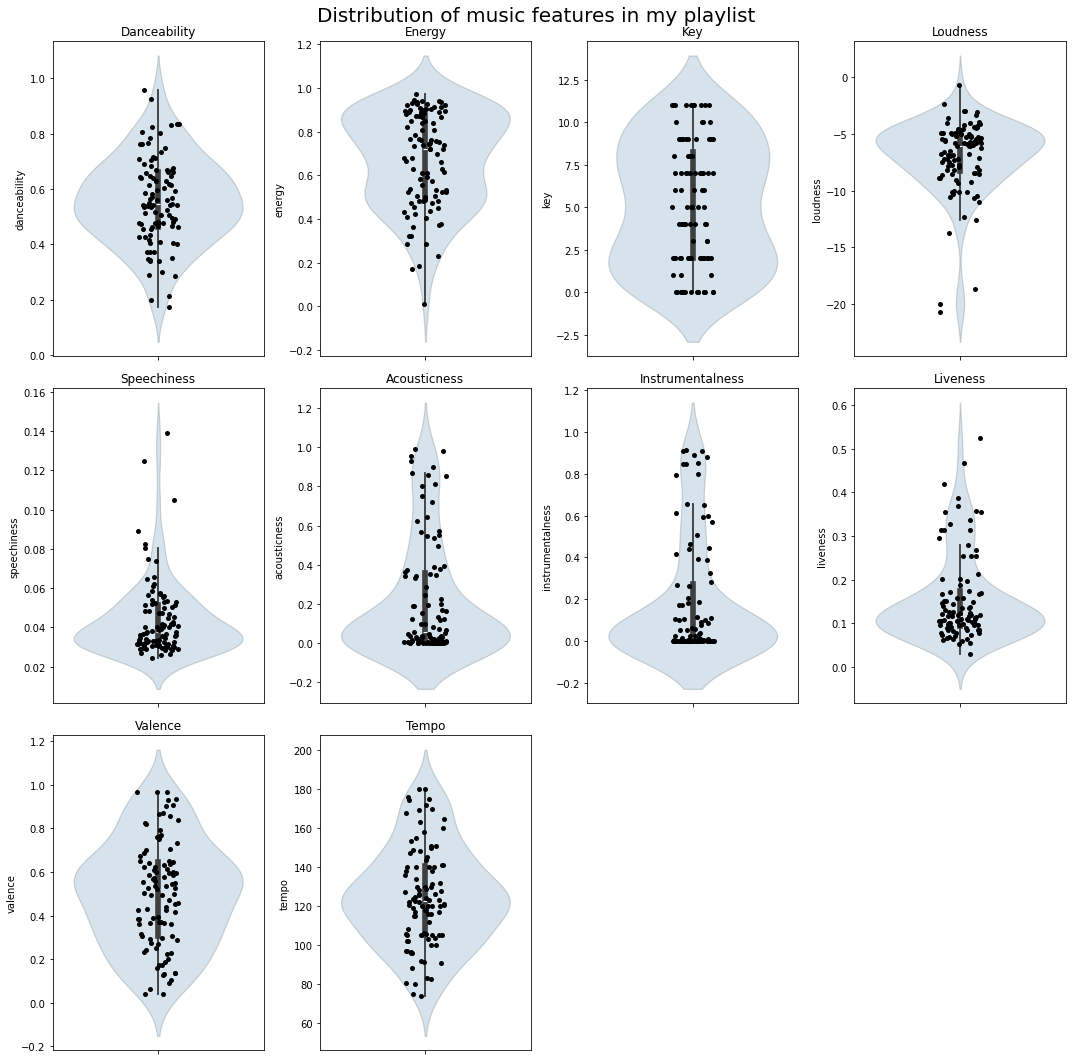

In [144]:
# Plot distribution of audio features
import matplotlib.pyplot as plt
import seaborn as sns
audio_features = ['danceability', 'energy', 'key', 'loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
print(f'Number of audio features: {len(audio_features)}')
plt.figure(figsize=(15, 15))
for i, feature in enumerate(audio_features):
    plt.subplot(3, 4, i+1)
    # feature_data = music_features[feature].to_numpy()
    # plt.sca÷(music_features[feature])
    sns.violinplot(music_features[feature], 
                   alpha = 0.2)
    sns.stripplot(music_features[feature], 
                  jitter = 0.1, 
                  color = 'black')
    plt.title(f'{feature.capitalize()}')
## add overall title
plt.suptitle('Distribution of music features in my playlist', fontsize = 20)
plt.tight_layout()
plt.show()

My type of music tends to be

* normal/symmetrical in danceability, key, valence and tempo
* **high** in energy, loudness
* **low** in speechiness, acousticness, instrumentalness, liveness

## What is the distribution of my top artists?

In [122]:
top_3_artists = phd_in_music_df.artist_name.value_counts().head(3).index
# music_features_top_subset = music_features[music_features.artist.isin(top_3_artists)]
# music_features_else = music_features[~music_features.artist.isin(top_3_artists)]
# print(music_features.shape)
# print(music_features_top_subset.shape)

## Create a new col that says if the song is by a top artist
music_features['top_3_artists'] = music_features['artist'].isin(top_3_artists)

print(f'My top 3 artists: {top_3_artists.tolist()}')



My top 3 artists: ['The 1975', 'The Strokes', 'Royel Otis']


Number of audio features: 10


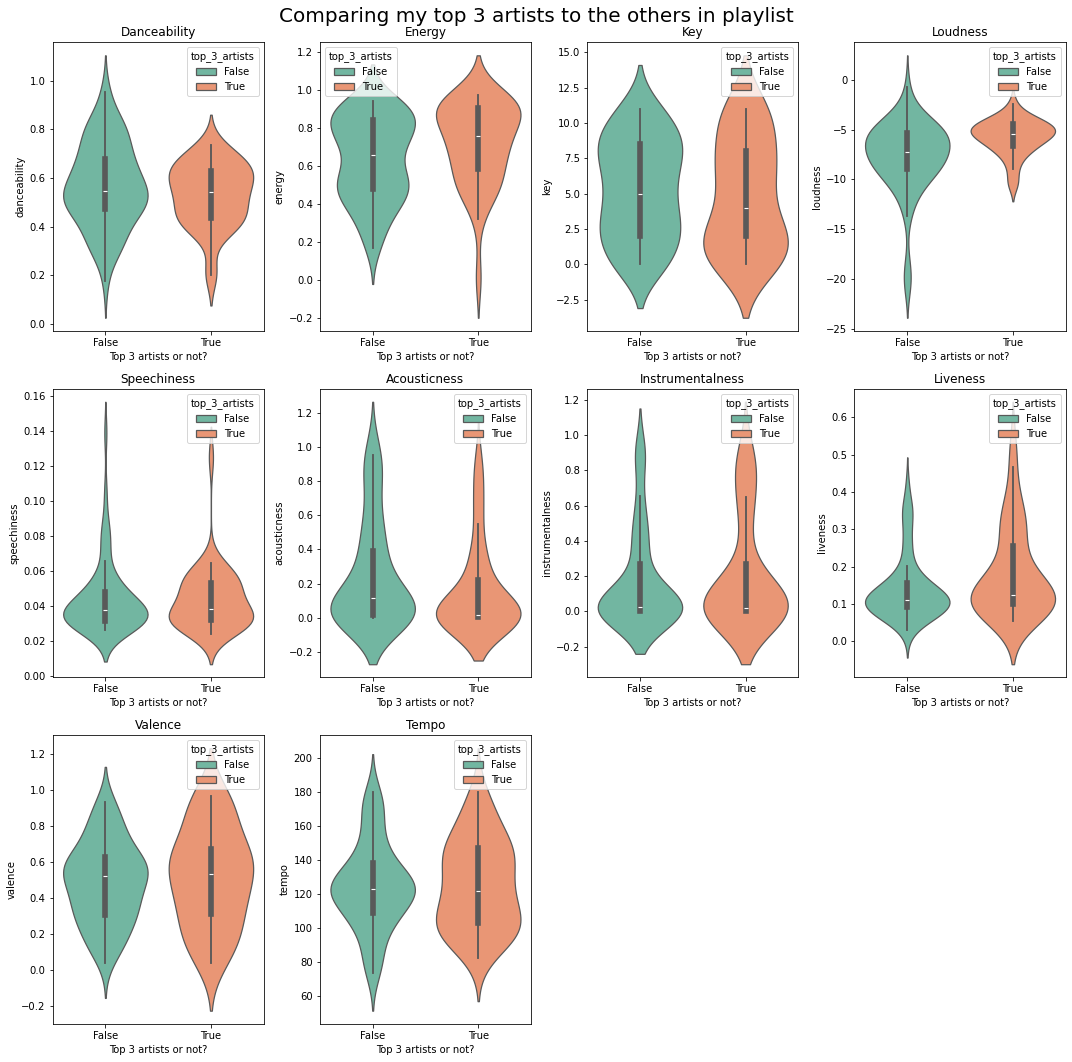

In [123]:
# Plot distribution of audio features
import matplotlib.pyplot as plt
import seaborn as sns
audio_features = ['danceability', 'energy', 'key', 'loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
print(f'Number of audio features: {len(audio_features)}')
plt.figure(figsize=(15, 15))
for i, feature in enumerate(audio_features):
    plt.subplot(3, 4, i+1)
    # feature_data = music_features[feature].to_numpy()
    # plt.sca÷(music_features[feature])
    sns.violinplot(y = music_features[feature],x = music_features['top_3_artists'], 
                   hue=music_features['top_3_artists'], 
                   palette='Set2')
    plt.title(f'{feature.capitalize()}')
    # sns.stripplot(music_features_else[feature], 
    #               jitter = 0.1, 
    #               color = 'grey')
    plt.title(f'{feature.capitalize()}')
    plt.xlabel('Top 3 artists or not?')
## Add overall title for all plots
plt.suptitle('Comparing my top 3 artists to the others in playlist', fontsize = 20)
plt.tight_layout()
plt.show()

I cannot really see a significant difference between the features for my top 3 artists within the playlist and the other artists inside. Perhaps there is already a self selection bias that is causing similar features amongst all the songs in the playlist. Let us compare with a selection of mainstream songs to see if there is a discernable difference between my taste and the average taste. 

### Sample some mainstream music for comparison -- Top 50 Global

![Screenshot 2024-07-18 at 12.45.12 PM.png](<attachment:Screenshot 2024-07-18 at 12.45.12 PM.png>)
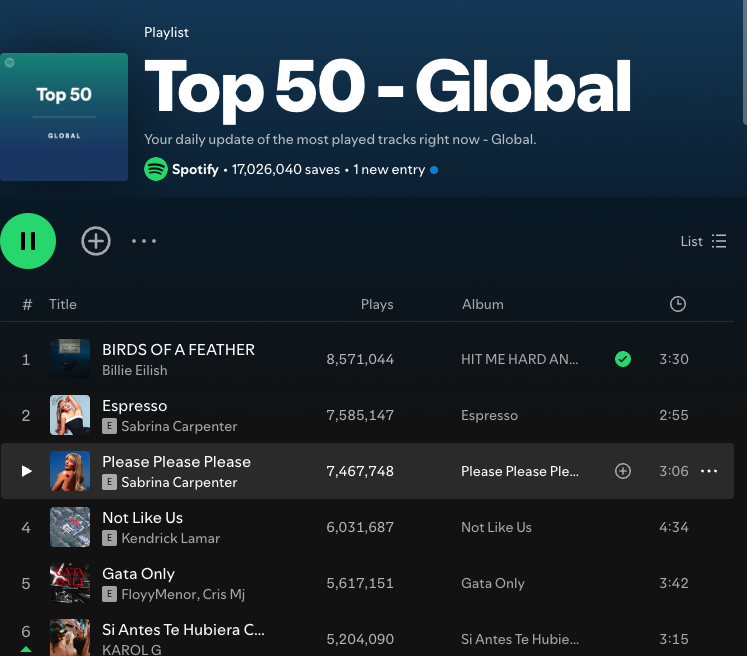

In [256]:
## Function to get music features of songs from a particular playlist
def playlist_audio_features_df_generator(playlist_id, number_songs = 100):
    playlist_tracks =  sp.playlist_tracks(playlist_id=playlist_id, limit= number_songs)
    playlist_songs_info = get_songs_from_json(playlist_tracks)
    songs_df = pd.DataFrame(playlist_songs_info)
    ## Add song ids
    list_track_ids = [] 
    for song in playlist_songs_info:
        artist = song['artist_name']
        track = song['track_name']
        track_id = sp.search(q='artist:' + artist + ' track:' + track, type='track')['tracks']['items'][0]['id']
        list_track_ids.append(track_id)
    songs_df['track_id'] = list_track_ids
    ## Get audio features
    temp_holder = []
    for track_id in songs_df['track_id']:
        temp_holder.append(sp.audio_features(track_id)[0]) ## somehow the result is a list of dictionary, therefore need to access the (only) element of the list
    music_features = pd.DataFrame(temp_holder)
    return(music_features)



In [258]:
music_features_top_50_2 = playlist_audio_features_df_generator(playlist_id='37i9dQZEVXbMDoHDwVN2tF', number_songs=len(phd_in_music_df))

## check
print(music_features_top_50_2.shape)
music_features_top_50_2.head()

(50, 18)


danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.747   0.507    2   -10.171     1       0.0358       0.20000   
1         0.701   0.760    0    -5.478     1       0.0285       0.10700   
2         0.660   0.756    0    -3.743     0       0.0320       0.00289   
3         0.669   0.586    9    -6.073     1       0.0540       0.27400   
4         0.898   0.472    1    -7.001     1       0.0776       0.01070   

   instrumentalness  liveness  valence    tempo            type  \
0          0.060800     0.117    0.438  104.978  audio_features   
1          0.000065     0.185    0.690  103.969  audio_features   
2          0.000000     0.193    0.838  116.034  audio_features   
3          0.000000     0.104    0.579  107.071  audio_features   
4          0.000000     0.141    0.214  101.061  audio_features   

                       id                                   uri  \
0  6dOtVTDdiauQNBQEDOtlAB  spotify:track:6dOtVTDdiauQNBQEDOtlAB   
1  2qSkIjg1o9h3YT9RAgYN75  spotify:track:2qSkIjg1o9h3YT9RAgYN75   
2  7tI8dRuH2Yc6RuoTjxo4dU  spotify:track:7tI8dRuH2Yc6RuoTjxo4dU   
3  5N3hjp1WNayUPZrA8kJmJP  spotify:track:5N3hjp1WNayUPZrA8kJmJP   
4  6AI3ezQ4o3HUoP6Dhudph3  spotify:track:6AI3ezQ4o3HUoP6Dhudph3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...   
1  https://api.spotify.com/v1/tracks/2qSkIjg1o9h3...   
2  https://api.spotify.com/v1/tracks/7tI8dRuH2Yc6...   
3  https://api.spotify.com/v1/tracks/5N3hjp1WNayU...   
4  https://api.spotify.com/v1/tracks/6AI3ezQ4o3HU...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/6dOt...       210373   
1  https://api.spotify.com/v1/audio-analysis/2qSk...       175459   
2  https://api.spotify.com/v1/audio-analysis/7tI8...       170888   
3  https://api.spotify.com/v1/audio-analysis/5N3h...       186365   
4  https://api.spotify.com/v1/audio-analysis/6AI3...       274192   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [260]:
## Combine the two into a large df

## 1. make a new column that shows which source the data is from 
music_features_top_50_2['source'] = 'Spotify Top 50'
music_features['source'] = 'My playlist'

## 2. Combine them now 
music_features_combined = pd.concat([music_features, music_features_top_50_2], axis = 0)
music_features_combined.shape ## correct 

(150, 23)

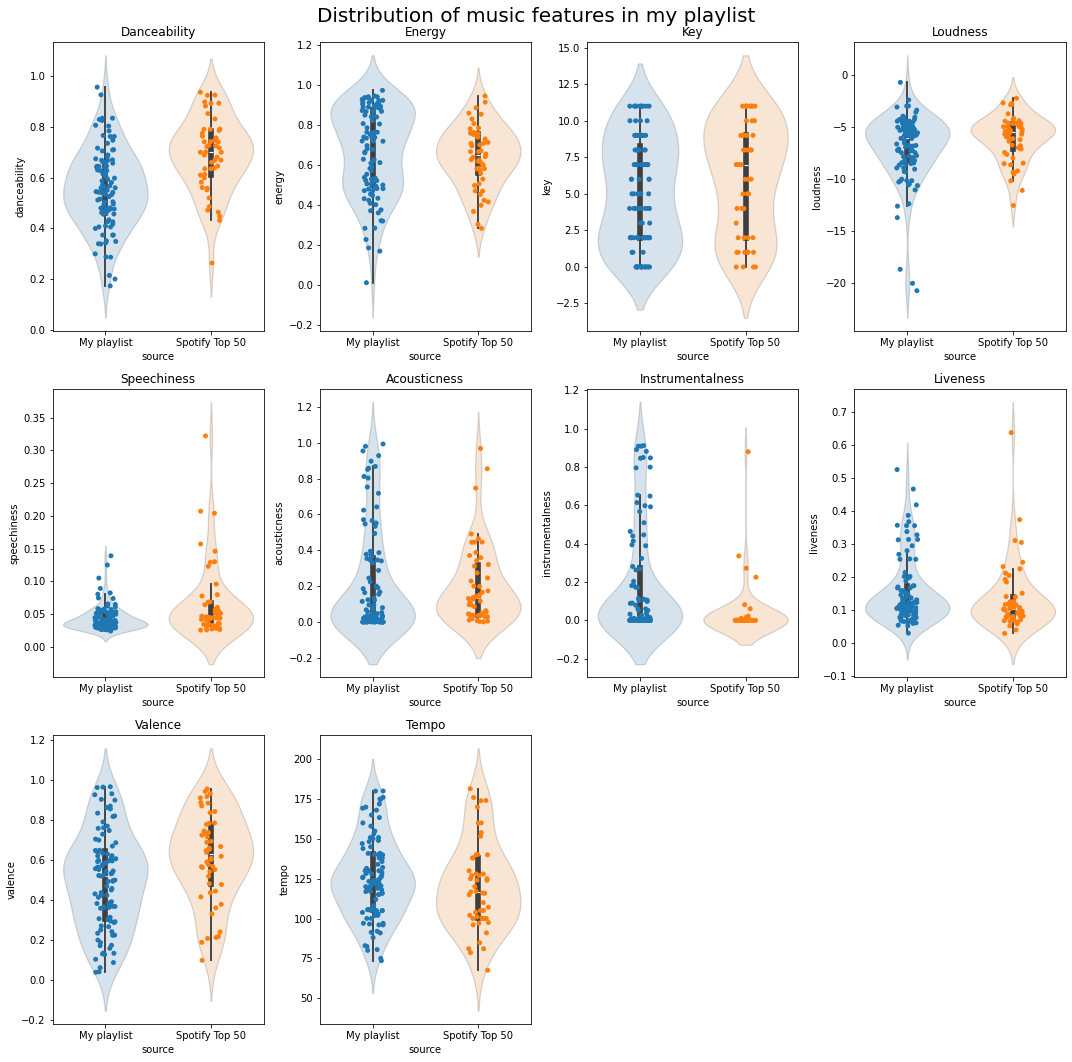

In [261]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(audio_features):
    plt.subplot(3, 4, i+1)
    # feature_data = music_features[feature].to_numpy()
    # plt.sca÷(music_features[feature])
    sns.violinplot(data = music_features_combined, x = 'source',
                hue = 'source',
                y = feature, 
                # showfliers = False, 
                legend=False, alpha = .2)
    sns.stripplot(data = music_features_combined, x = 'source',
                hue = 'source',
                y = feature)
    # sns.catplot(music_features_combined[feature], 
    #               jitter = 0.1, 
                    
    #               hue = music_features_combined['my_playlist'],
    #               color = 'black')
    plt.title(f'{feature.capitalize()}')
## add overall title
plt.suptitle('Distribution of music features in my playlist', fontsize = 20)
plt.tight_layout()
plt.show()

# More visualisations

### Pairs plot

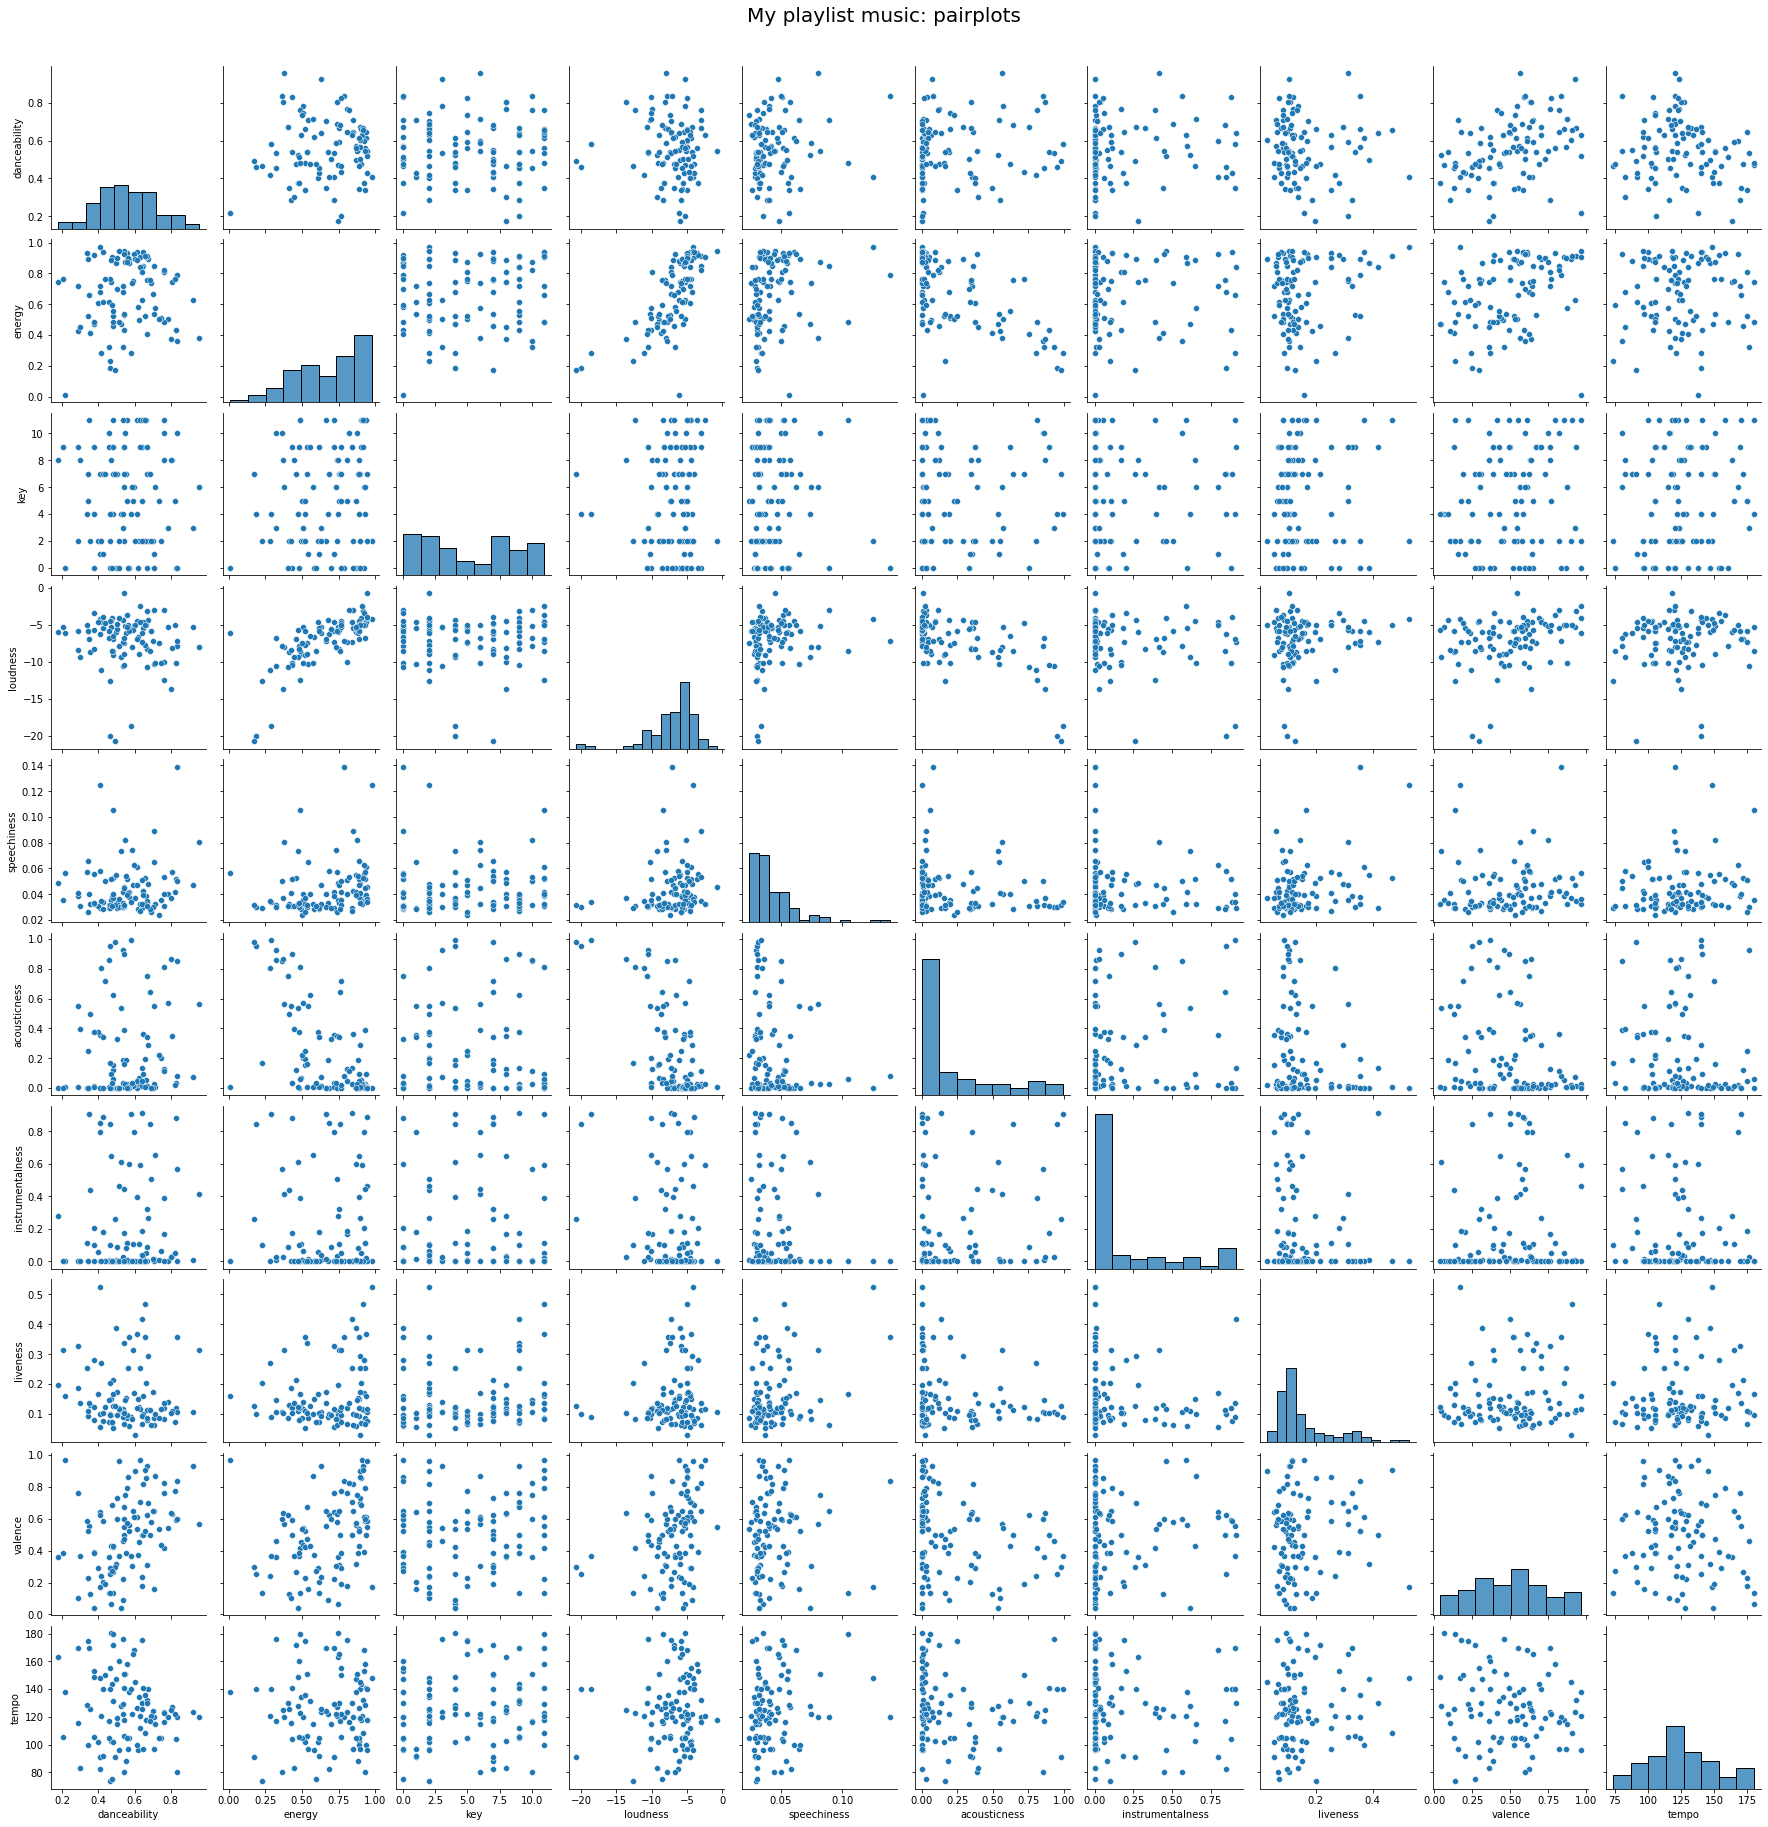

In [147]:
sns.pairplot(music_features[audio_features])
plt.suptitle('My playlist music: pairplots', y = 1.02, fontsize = 20)
plt.show()

### Correlation heatmap

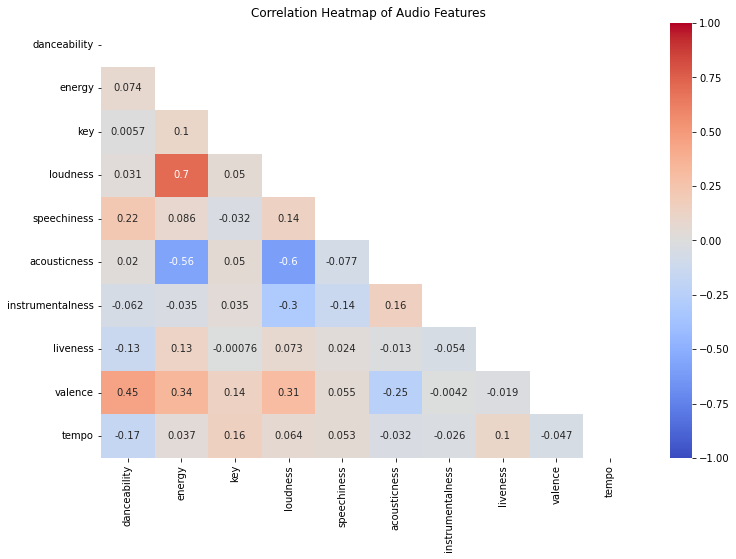

In [149]:
import numpy as np
plt.figure(figsize=(12, 8))
correlation_matrix = music_features_combined[audio_features].corr()
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            mask = mask,
            vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Audio Features')
plt.show()

As we can imagine, from the combined dataset, acousticness is negatively correlated with energy and loudness - an acoustic song, say from Hozier, is softer and lower in energy. Valence is closely tied with danceability and energy, loudness. 

Apart from that, we do not see too much correlation. This could mean that multicollinearity may not be too much of an issue, but more checks are needed.

# Dimensionality Reduction

### t-SNE: dimensionality reduction

- nonlinear dimensionality reduction --> good for data that cannot be separated linearly i.e. with a straight line
- algorithm uses a probability distribution to represent similarities between datapoints/neighbours 
- then the algorithm tries to map the points into a lower dimensional space that has a probability distribution that is similar to that of the high dimension

from chatgpt:

![Screenshot 2024-07-22 at 11.24.15 AM.png](<attachment:Screenshot 2024-07-22 at 11.24.15 AM.png>)
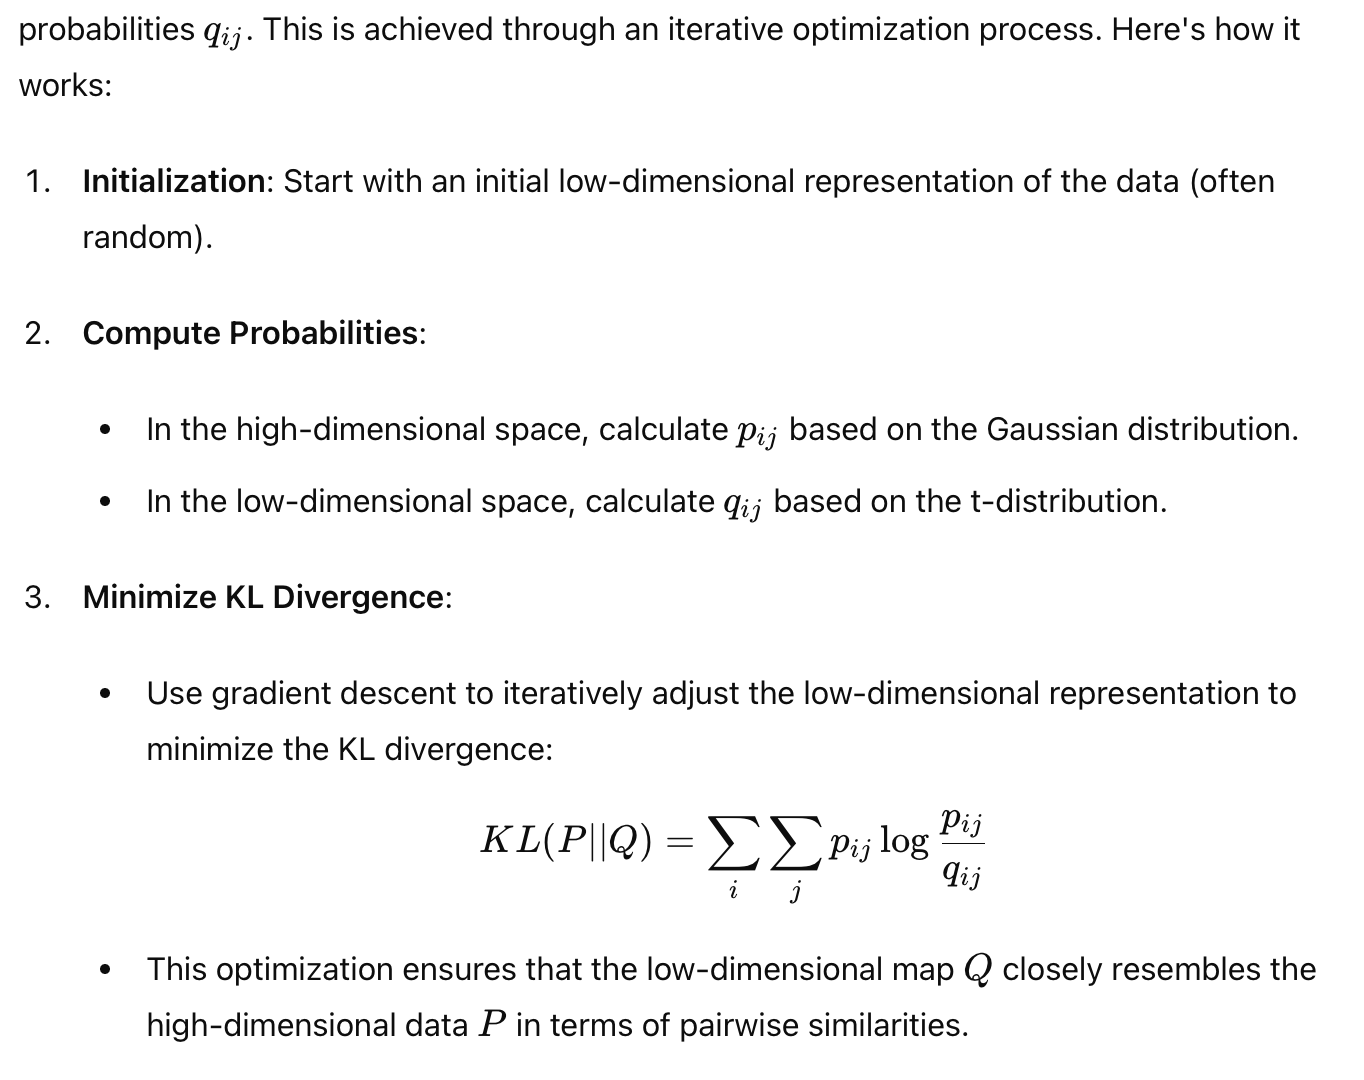

In [263]:
## proprocessing 
## 1. make a new column that shows which source the data is from 
music_features_combined['source_binarised'] = music_features_combined['source'].map({'Spotify Top 50': 0,
                                                                                     'My playlist':1})
## check 
music_features_combined['source_binarised'].value_counts()

source_binarised
1    100
0     50
Name: count, dtype: int64

In [264]:
x_features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = music_features_combined[x_features]
y = music_features_combined['source_binarised']

In [153]:
## Standardising 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [156]:
## Apply t-SNE algo 
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, learning_rate='auto') ## for reproducibility, since different inits can result in different results 
X_tsne = tsne.fit_transform(X_scaled)


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [166]:
## See results of t-sne 
tsne.get_params()

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'warn',
 'learning_rate': 'auto',
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 30.0,
 'random_state': 42,
 'square_distances': 'legacy',
 'verbose': 0}

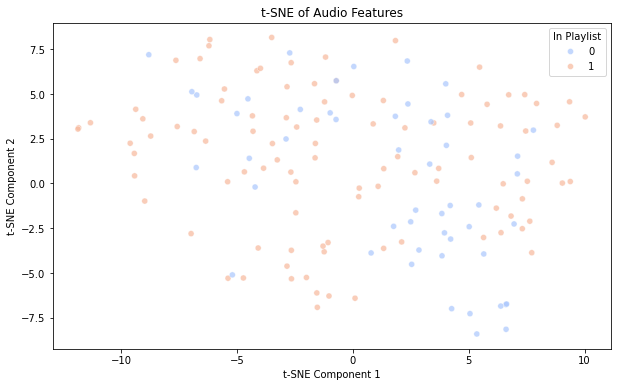

In [157]:
# Plot the t-SNE-transformed data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title('t-SNE of Audio Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='In Playlist')
plt.show()

## Try different values for perplexity and learning rate

/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


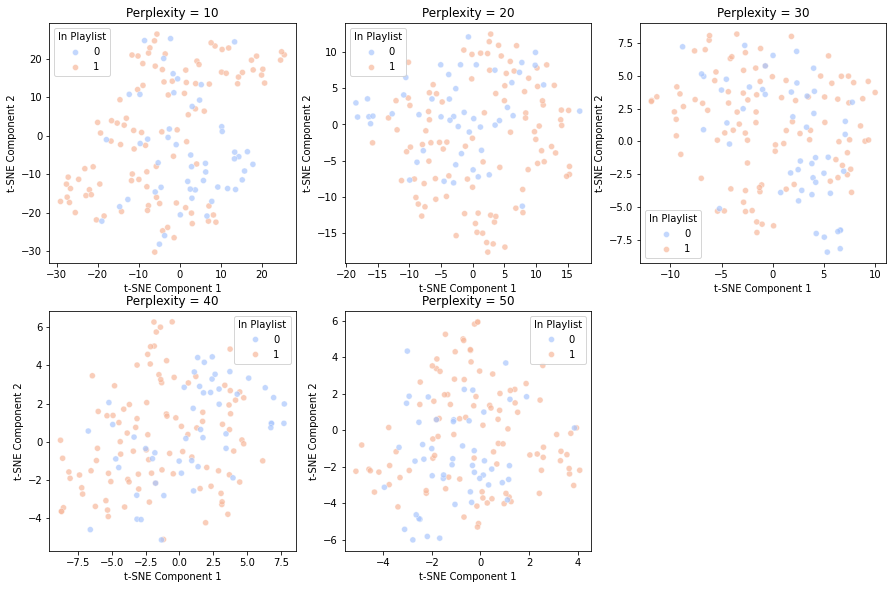

In [168]:
perplexity_values = [10,20,30,40,50]
plt.figure(figsize=(15, 15))

for i in range(len(perplexity_values)):
    ## refit the tsne
    tsne = TSNE(n_components=2, random_state=42, 
                perplexity=perplexity_values[i],
                learning_rate='auto') ## for reproducibility, since different inits can result in different results 
    X_tsne = tsne.fit_transform(X_scaled)
    plt.subplot(3,3,i+1)
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='coolwarm', alpha=0.7)
    plt.title(f'Perplexity = {perplexity_values[i]}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='In Playlist')
plt.show()
    


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ian

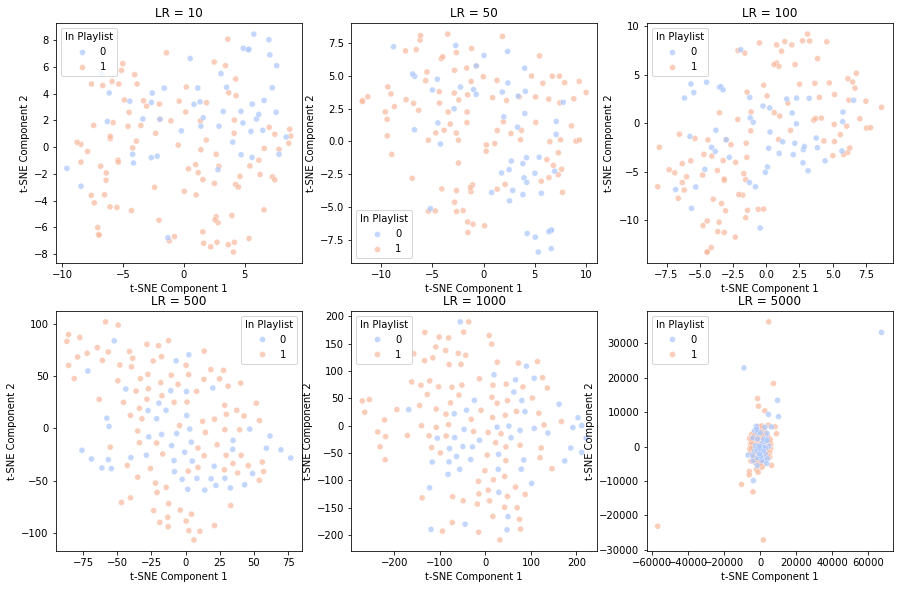

In [173]:
## Try different learning rates as well
lrs = [10,50,100,500,1000, 5000]
plt.figure(figsize=(15, 15))

for i in range(len(lrs)):
    ## refit the tsne
    tsne = TSNE(n_components=2, random_state=42, 
                learning_rate=lrs[i]) ## for reproducibility, since different inits can result in different results 
    X_tsne = tsne.fit_transform(X_scaled)
    plt.subplot(3,3,i+1)
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='coolwarm', alpha=0.7)
    plt.title(f'LR = {lrs[i]}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='In Playlist')
plt.show()
    

We see 'better' (more separable) results when using a larger LR, where the ideal value is somewhere around **lr = 1000**. Past that point, we can see that most points start to cluster around a center with some outliers. 

### PCA 


In [174]:
from sklearn.decomposition import PCA

In [177]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

X_pca.shape ## we get 10 PCs (principle components) and the same datapoints but projected onto the new PCs


(150, 10)

In [200]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

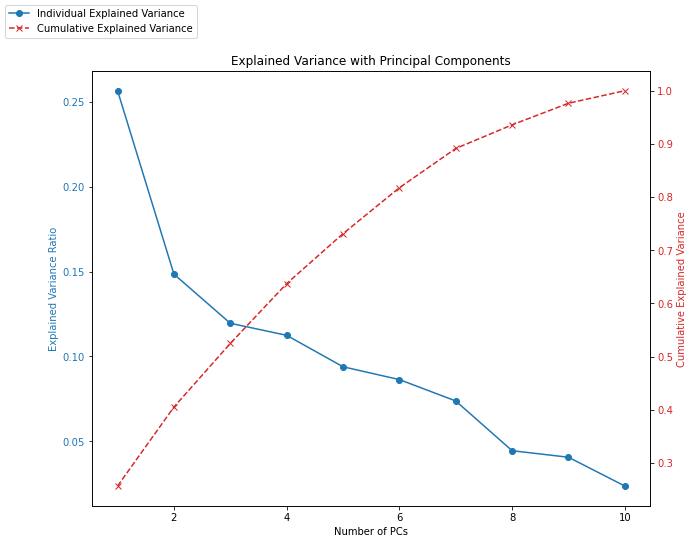

In [204]:
fig, ax1 = plt.subplots(figsize = (10,8))

color = 'tab:blue'
ax1.set_xlabel('Number of PCs')
ax1.set_ylabel('Explained Variance Ratio', color = color)
ax1.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', color=color, label='Individual Explained Variance')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative Explained Variance', color=color)
ax2.plot(range(1, len(cumulative_explained_variance) + 1), 
         cumulative_explained_variance, 
         marker='x', linestyle='--', 
         color=color, label='Cumulative Explained Variance')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Explained Variance with Principal Components')
fig.legend(loc="upper left"
           #, bbox_to_anchor=(0.1,0.9)
           )
plt.show()

### Set threshold of 85% of variance to capture

In [228]:
min_variance = 0.85
number_pcs = np.min(np.where(cumulative_explained_variance > min_variance))
pca_80_percent = PCA(n_components=number_pcs)
## Fit the PCA
X_pca_80_percent = pca_80_percent.fit_transform(X_scaled)

print(f'To cover at least {min_variance} of original variance, we need {number_pcs} Principle Components')

To cover at least 0.85 of original variance, we need 6 Principle Components


In [229]:
## check
X_pca_80_percent.shape

(150, 6)

### Visualise the PCA using the first two PCs

In [242]:
pca_80_percent.components_.shape ## the 6 principle components that were found via eignevector extraction
loadings = pca_80_percent.components_.T * np.sqrt(pca_80_percent.explained_variance_) ## save loadings 



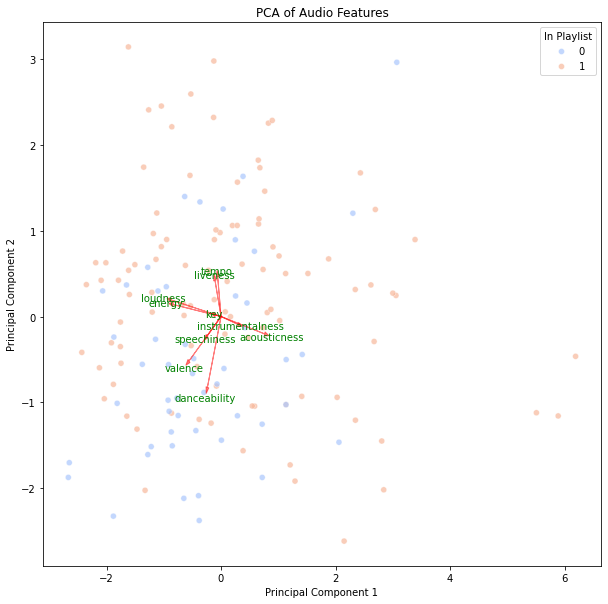

In [245]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_pca_80_percent[:, 0], y=X_pca_80_percent[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title('PCA of Audio Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='In Playlist')
for i, feature in enumerate(x_features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5, head_width=0.05)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature, color='g', ha='center', va='center')

plt.show()


# Can we predict if I will like a song based on the audio features? 

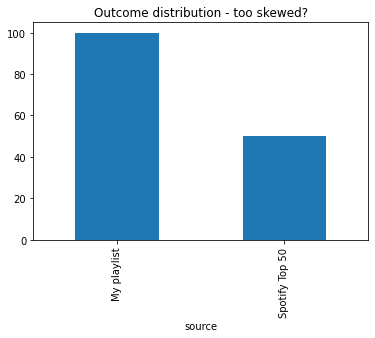

In [248]:
music_features_combined.source.value_counts().plot(kind = 'bar')
plt.title('Outcome distribution - too skewed?')
plt.show()

We can either balance down the songs from my playlist, or add more songs that are not in my playlist

### A different source: Top 100 most streamed

From this [link](https://open.spotify.com/playlist/5ABHKGoOzxkaa28ttQV9sE)

![Screenshot 2024-07-23 at 10.28.35 AM.png](<attachment:Screenshot 2024-07-23 at 10.28.35 AM.png>)
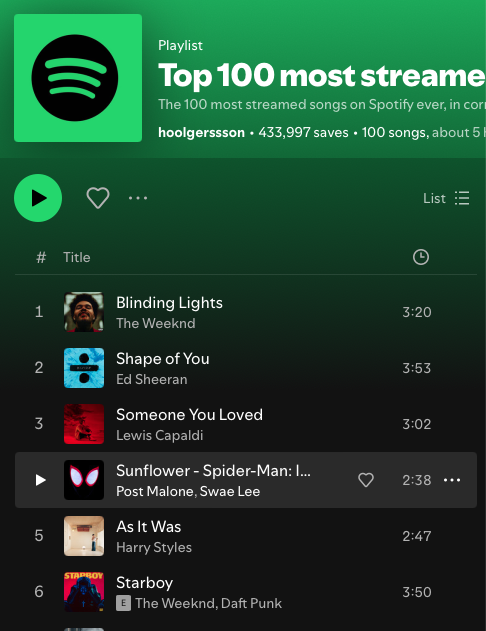

In [279]:
## Download and form a new combined music features dataset
playlist_id = '5ABHKGoOzxkaa28ttQV9sE'
number_songs = 100
def playlist_audio_features_df_generator(playlist_id, number_songs=100):
    playlist_tracks = sp.playlist_tracks(playlist_id=playlist_id, limit=number_songs)
    playlist_songs_info = get_songs_from_json(playlist_tracks)
    songs_df = pd.DataFrame(playlist_songs_info)
    
    ## Add song ids
    list_track_ids = []
    for song in playlist_songs_info:
        artist = song['artist_name']
        track = song['track_name']
        result = sp.search(q='artist:' + artist + ' track:' + track, type='track')
        if result['tracks']['items']:
            track_id = result['tracks']['items'][0]['id']
        else:
            track_id = None  # or you can use np.nan
        list_track_ids.append(track_id)
    
    songs_df['track_id'] = list_track_ids
    
    ## Remove rows with missing track IDs
    songs_df = songs_df.dropna(subset=['track_id'])
    
    ## Get audio features
    temp_holder = []
    for track_id in songs_df['track_id']:
        audio_features = sp.audio_features(track_id)
        if audio_features[0]:  # Check if the audio features are not None
            temp_holder.append(audio_features[0])
        else:
            temp_holder.append(None)
    
    music_features = pd.DataFrame(temp_holder)
    music_features = music_features.dropna()  # Remove rows with missing audio features
    
    return music_features

In [280]:
top_100_music_features = playlist_audio_features_df_generator(playlist_id=playlist_id, number_songs=number_songs)

In [283]:
print(top_100_music_features.shape)
top_100_music_features.head()

(95, 18)


danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.513   0.730    1    -5.940     1       0.0598       0.00143   
1         0.825   0.652    1    -3.183     0       0.0802       0.58100   
2         0.501   0.405    1    -5.679     1       0.0319       0.75100   
3         0.760   0.478    2    -5.574     1       0.0467       0.55200   
4         0.520   0.731    6    -5.338     0       0.0557       0.34200   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000095    0.0897    0.334  171.001  audio_features   
1          0.000000    0.0931    0.931   95.977  audio_features   
2          0.000000    0.1050    0.446  109.891  audio_features   
3          0.000000    0.0703    0.913   89.908  audio_features   
4          0.001010    0.3110    0.662  173.930  audio_features   

                       id                                   uri  \
0  0VjIjW4GlUZAMYd2vXMi3b  spotify:track:0VjIjW4GlUZAMYd2vXMi3b   
1  7qiZfU4dY1lWllzX7mPBI3  spotify:track:7qiZfU4dY1lWllzX7mPBI3   
2  7qEHsqek33rTcFNT9PFqLf  spotify:track:7qEHsqek33rTcFNT9PFqLf   
3  3KkXRkHbMCARz0aVfEt68P  spotify:track:3KkXRkHbMCARz0aVfEt68P   
4  4Dvkj6JhhA12EX05fT7y2e  spotify:track:4Dvkj6JhhA12EX05fT7y2e   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...   
1  https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...   
2  https://api.spotify.com/v1/tracks/7qEHsqek33rT...   
3  https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...   
4  https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/0VjI...       200040   
1  https://api.spotify.com/v1/audio-analysis/7qiZ...       233713   
2  https://api.spotify.com/v1/audio-analysis/7qEH...       182161   
3  https://api.spotify.com/v1/audio-analysis/3KkX...       158040   
4  https://api.spotify.com/v1/audio-analysis/4Dvk...       167303   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [284]:
## Concat to form new combined df
top_100_music_features['source'] = 'Top 100 Streamed'

## 2. Combine them now 
music_features_combined_balanced = pd.concat([music_features, top_100_music_features], axis = 0)

## Check
music_features_combined_balanced.shape


(195, 23)

## Model: SVM with original dataset (no dimensionality reduction)

In [318]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC ## for classifer instead of regressor
from skopt import BayesSearchCV ## for hyperparam tuning
from skopt.space import Real, Categorical 
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [297]:
## data prep
X = music_features_combined_balanced[audio_features]
y = music_features_combined_balanced['source']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


### Hyperparameters for SVC

* C: penalisation parameter -- low C allows for smooth decision boundary and allows for some misclassification, while high C penalises misclassification and is hence less smooth and more overfitted. 

* gamma: defines how much influence a single datapoint has -- larger gamma 

In [306]:
## creating the pipeline 
pipeline = Pipeline(
    [
        ('scaler', StandardScaler()), 
        ('svm', SVC())]
)

## define the param space -- for C (penalisation parameter), gamma (complexity parameter), kernel choice
param_space = {
    'svm__C': Real(0.1, 100, prior = 'log-uniform'), ## use log uniform -- allows a wide range and emphasises smaller values due to reciprocal function
    'svm__gamma': Real(0.001, 1, prior = 'log-uniform'),
    'svm__kernel': Categorical(['rbf', 'linear'])
}

## use bayesearchcv for cross validation and hyperparam tuning 
bayes_search = BayesSearchCV(
    estimator = pipeline, ## pipeline includes scaling and svm 
    search_spaces = param_space,
    n_iter = 32, 
    cv = 5, ## 5 fold cross validation
    n_jobs = -1,
    verbose = 2, 
    random_state = 42
)

In [307]:
## Fitting the model 
bayes_search.fit(X_train, y_train)

## Check results 
print(f"Best params are : {bayes_search.best_params_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings

[CV] END svm__C=1.6994636371262763, svm__gamma=0.15246748254295628, svm__kernel=linear; total time=   4.7s
[CV] END svm__C=1.6994636371262763, svm__gamma=0.15246748254295628, svm__kernel=linear; total time=   4.7s
[CV] END svm__C=1.6994636371262763, svm__gamma=0.15246748254295628, svm__kernel=linear; total time=   4.7s
[CV] END svm__C=1.6994636371262763, svm__gamma=0.15246748254295628, svm__kernel=linear; total time=   4.7s
[CV] END svm__C=1.6994636371262763, svm__gamma=0.15246748254295628, svm__kernel=linear; total time=   4.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END svm__C=32.52108800594495, svm__gamma=0.4466278825224283, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=32.52108800594495, svm__gamma=0.4466278825224283, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=32.52108800594495, svm__gamma=0.4466278825224283, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=32.52108800594495, svm__gamma=0.4466278825224283, svm__kernel=rbf; total time=   0.0

/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


[CV] END svm__C=32.52108800594495, svm__gamma=0.4466278825224283, svm__kernel=rbf; total time=   1.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END svm__C=2.1602177830877722, svm__gamma=0.5703843027403095, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=2.1602177830877722, svm__gamma=0.5703843027403095, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=2.1602177830877722, svm__gamma=0.5703843027403095, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=2.1602177830877722, svm__gamma=0.5703843027403095, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=2.1602177830877722, svm__gamma=0.5703843027403095, svm__kernel=rbf; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END svm__C=27.364528220782454, svm__gamma=0.0032780432870046913, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=27.364528220782454, svm__gamma=0.0032780432870046913, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=27.364528220782454, svm__gamma=

/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


[CV] END svm__C=27.364528220782454, svm__gamma=0.0032780432870046913, svm__kernel=linear; total time=   1.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END svm__C=25.041499136197736, svm__gamma=0.02061045404501547, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=25.041499136197736, svm__gamma=0.02061045404501547, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=25.041499136197736, svm__gamma=0.02061045404501547, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=25.041499136197736, svm__gamma=0.02061045404501547, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=25.041499136197736, svm__gamma=0.02061045404501547, svm__kernel=linear; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END svm__C=15.925169151603527, svm__gamma=0.6578232405415442, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=15.925169151603527, svm__gamma=0.6578232405415442, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=15.9251691516035

/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END svm__C=73.52481813242629, svm__gamma=0.1264341327263626, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=73.52481813242629, svm__gamma=0.1264341327263626, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=73.52481813242629, svm__gamma=0.1264341327263626, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=73.52481813242629, svm__gamma=0.1264341327263626, svm__kernel=linear; total time=   0.0s


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


[CV] END svm__C=73.52481813242629, svm__gamma=0.1264341327263626, svm__kernel=linear; total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END svm__C=0.10253943538922508, svm__gamma=0.2841123150877317, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.10253943538922508, svm__gamma=0.2841123150877317, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.10253943538922508, svm__gamma=0.2841123150877317, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.10253943538922508, svm__gamma=0.2841123150877317, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.10253943538922508, svm__gamma=0.2841123150877317, svm__kernel=linear; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...svm__C=0.1, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END ...svm__C=0.1, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END ...svm__C=0.1, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s

In [372]:
print(f"The best model is : {bayes_search.best_estimator_}")
print(f"The best score is : {bayes_search.best_score_:.2f}")

The best model is : Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=19.86389523656316, gamma=0.001))])
The best score is : 0.72


#### Evaluating the model 

In [394]:
def evaluate_binary_model(model):
    ## Create 2 plots - one for train and one for test
    fig, axes = plt.subplots(1,2,figsize = (14,8))
    
    ## For test set (more important)
    y_pred = model.predict(X_test)
    cf_matrix_test = confusion_matrix(y_test, y_pred, labels = bayes_search.best_estimator_.classes_)
    display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix_test, display_labels = bayes_search.best_estimator_.classes_)
    display.plot(ax = axes[0])
    axes[0].set_title(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    
    ## For train set (less important, since model was trained on this)
    y_train_pred = model.predict(X_train)
    cf_matrix_train = confusion_matrix(y_train, y_train_pred, labels = bayes_search.best_estimator_.classes_)
    display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix_train, display_labels = bayes_search.best_estimator_.classes_)
    display.plot(ax = axes[1])
    axes[1].set_title(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
    plt.tight_layout()
    plt.show()

def get_accuracy_scores(model, x,y):
    y_pred = model.predict(x)
    y_true = y
    return(accuracy_score(y_pred=y_pred, y_true=y_true))


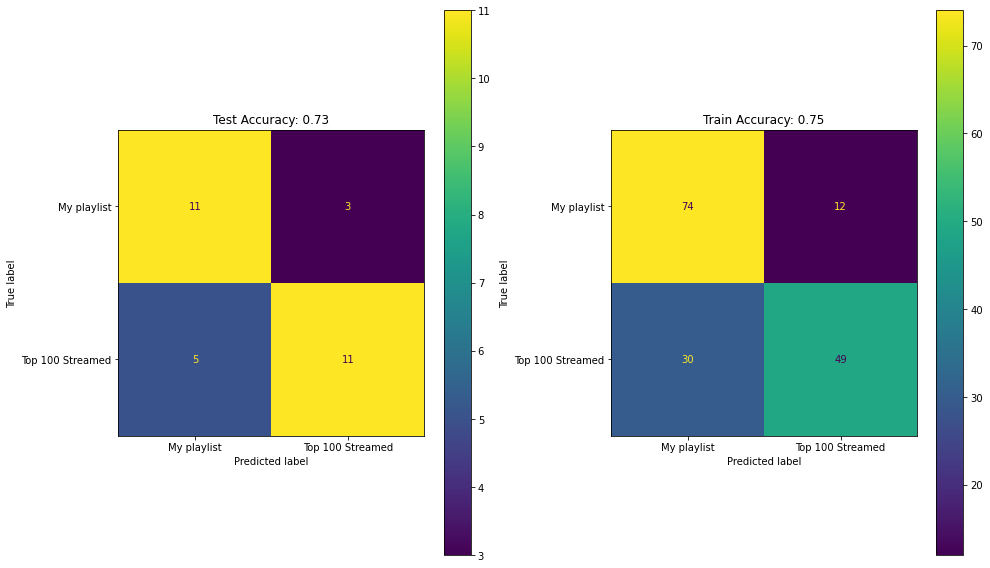

In [453]:
evaluate_binary_model(bayes_search)

## What about using PCA reduced dataset? 

### First, prepare the dimensionally-reduced dataset (use 85% threshold value of 6 from the previous analysis)

In [348]:
from skopt.space import Integer

## Create new pipeline 
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),  ## same as before
    ('pca', PCA(n_components=6)),  ## for this, we will use the inital ncomps as 6
    ('svm', SVC())  # SVM classifier
])

## Add new param for the param space for pca
param_space['pca__n_components'] = Integer(4,7) ## avoid going too high as the point of pca is to use a reduced dimensionality dataset

## check param space
print(param_space)

{'svm__C': Real(low=0.1, high=100, prior='log-uniform', transform='normalize'), 'svm__gamma': Real(low=0.001, high=1, prior='log-uniform', transform='normalize'), 'svm__kernel': Categorical(categories=('rbf', 'linear'), prior=None), 'pca__n_components': Integer(low=4, high=7, prior='uniform', transform='identity')}


In [350]:
## new bayes search
bayes_search_pca = BayesSearchCV(
    estimator=pca_pipeline,  # The pipeline
    search_spaces=param_space,  # The parameter space
    n_iter=32,  # Number of iterations
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=2,  # Verbose output
    random_state=42  # Random state for reproducibility
)

## fit to data
bayes_search_pca.fit(X_train, y_train)

## see results 
print(f"Best params are : {bayes_search_pca.best_params_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings

[CV] END pca__n_components=5, svm__C=15.246748254295628, svm__gamma=0.6289324408100383, svm__kernel=rbf; total time=   1.5s
[CV] END pca__n_components=5, svm__C=15.246748254295628, svm__gamma=0.6289324408100383, svm__kernel=rbf; total time=   1.5s
[CV] END pca__n_components=5, svm__C=15.246748254295628, svm__gamma=0.6289324408100383, svm__kernel=rbf; total time=   1.5s
[CV] END pca__n_components=5, svm__C=15.246748254295628, svm__gamma=0.6289324408100383, svm__kernel=rbf; total time=   1.5s
[CV] END pca__n_components=5, svm__C=15.246748254295628, svm__gamma=0.6289324408100383, svm__kernel=rbf; total time=   1.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END pca__n_components=7, svm__C=44.66278825224283, svm__gamma=0.008132617181090027, svm__kernel=linear; total time=   0.0s
[CV] END pca__n_components=7, svm__C=44.66278825224283, svm__gamma=0.008132617181090027, svm__kernel=linear; total time=   0.0s
[CV] END pca__n_components=7, svm__C=44.66278825224283, svm__gamm

/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


[CV] END pca__n_components=7, svm__C=44.66278825224283, svm__gamma=0.008132617181090027, svm__kernel=linear; total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END pca__n_components=5, svm__C=57.038430274030944, svm__gamma=0.0020633717282254284, svm__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=5, svm__C=57.038430274030944, svm__gamma=0.0020633717282254284, svm__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=5, svm__C=57.038430274030944, svm__gamma=0.0020633717282254284, svm__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=5, svm__C=57.038430274030944, svm__gamma=0.0020633717282254284, svm__kernel=rbf; total time=   0.0s


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


[CV] END pca__n_components=5, svm__C=57.038430274030944, svm__gamma=0.0020633717282254284, svm__kernel=rbf; total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END pca__n_components=6, svm__C=0.3278043287004692, svm__gamma=0.06225026900894044, svm__kernel=linear; total time=   0.0s
[CV] END pca__n_components=6, svm__C=0.3278043287004692, svm__gamma=0.06225026900894044, svm__kernel=linear; total time=   0.0s
[CV] END pca__n_components=6, svm__C=0.3278043287004692, svm__gamma=0.06225026900894044, svm__kernel=linear; total time=   0.0s
[CV] END pca__n_components=6, svm__C=0.3278043287004692, svm__gamma=0.06225026900894044, svm__kernel=linear; total time=   0.0s


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


[CV] END pca__n_components=6, svm__C=0.3278043287004692, svm__gamma=0.06225026900894044, svm__kernel=linear; total time=   1.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END pca__n_components=6, svm__C=2.061045404501547, svm__gamma=0.03800674800490907, svm__kernel=linear; total time=   0.0s
[CV] END pca__n_components=6, svm__C=2.061045404501547, svm__gamma=0.03800674800490907, svm__kernel=linear; total time=   0.0s
[CV] END pca__n_components=6, svm__C=2.061045404501547, svm__gamma=0.03800674800490907, svm__kernel=linear; total time=   0.0s
[CV] END pca__n_components=6, svm__C=2.061045404501547, svm__gamma=0.03800674800490907, svm__kernel=linear; total time=   0.0s
[CV] END pca__n_components=6, svm__C=2.061045404501547, svm__gamma=0.03800674800490907, svm__kernel=linear; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END pca__n_components=6, svm__C=65.78232405415442, svm__gamma=0.003096146742088961, svm__kernel=rbf; total time=  

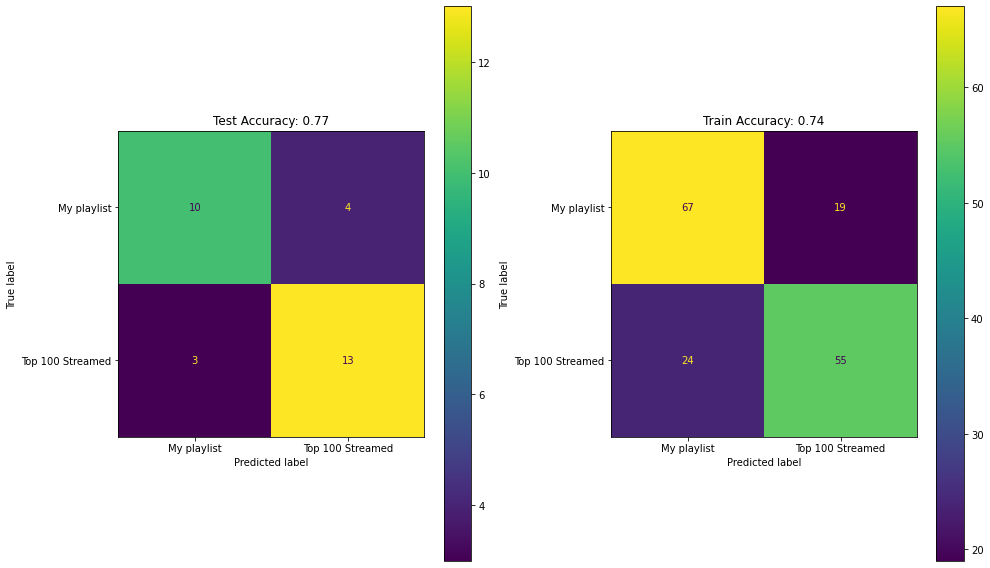

In [450]:
evaluate_binary_model(bayes_search_pca)

In [460]:
## Evaluate 
m1_train_acc = get_accuracy_scores(bayes_search, x = X_train, y = y_train)
m2_train_acc = get_accuracy_scores(bayes_search_pca, x = X_train, y = y_train)
m1_test_acc = get_accuracy_scores(bayes_search, x = X_test, y = y_test)
m2_test_acc = get_accuracy_scores(bayes_search_pca, x = X_test, y = y_test)

svc_results_df = pd.DataFrame([bayes_search.best_params_, bayes_search_pca.best_params_], index=['Model 1 (SVC)', 'Model 2 (PCA -> SVC)'])
svc_results_df['best score'] = [bayes_search.best_score_, bayes_search_pca.best_score_]
svc_results_df['train accuracy'] = [m1_train_acc, m2_train_acc]
svc_results_df['test accuracy'] = [m1_test_acc, m2_test_acc]

svc_results_df.round(decimals=2).T

Model 1 (SVC) Model 2 (PCA -> SVC)
svm__C                    19.86                 0.33
svm__gamma                  0.0                 0.06
svm__kernel                 rbf               linear
pca__n_components           NaN                  6.0
best score                 0.72                 0.72
train accuracy             0.75                 0.74
test accuracy              0.73                 0.77

Insights 
* the model with PCA required a much lower C (regularisation) value, i.e. there was less need to penalise wrongly classified datapoints <-- according to chatgpt, this is likely due to the kernel chosen, more below
* the gamma value is also much larger, showing that points had a greater influence on the determination of the decision boundary
* after undergoing pca, the decision boundary was closer to a linear than a non linear one 
* 6 components were sufficient to capture most information to allow for a good overall score
* the accuracy scores are similar although the pca model performed marginally better

It is hence possible that PCA allow less overfitting of the data, and therefore had better test accuracy, although is it possible that the test scores are due to chance (single test set could have been favourable to the second model)

## Model: Logistic regression with regularisation

* Benefits of Logistic Regression is that we can interpret the coefficient of the fitted model, and we can also get probabilities of a datapoints which reveals strength of estimations, e.g. a P(my playlist) = 0.99 is a much more confident vote than P(my playlist) = 0.6, although both would be classified as recommendations.
* We combine both L1 and L2 regression to form Elastic Net
    * Helps in situations where there are correlations between parameters --> since Ridge regression shrinks the parameters of all correlated variables, from [(StatQuest)](https://www.youtube.com/watch?v=1dKRdX9bfIo)
    * L1 helps with high dimensional data

### Hyperparameters
* alpha is the overall penalisation variable
* l1_ratio determines how much of the penalisation is from L1. if this is 0, then the regression becomes purely Ridge. if this is 1, then it becomes purely Lasso. Any value in between combines both Ridge and Lasso and is the point of Elastic Net. 

In [375]:
from sklearn.linear_model import LogisticRegression

In [377]:
## create pipeline for lr with L1 and L2 regularisation
enet_lr_pipeline = Pipeline([ ## inside the list are tuples
    ('scaler', StandardScaler()), ## rmb to include the brackets as we are initing the objects
    ('logreg', LogisticRegression(solver='saga', penalty='elasticnet'))
])

## create the param space
enet_lr_param_space = {
    'logreg__C': Real(0.01, 100, prior='log-uniform'), ## Must be positive float, smaller values specify stronger regularisation
    'logreg__l1_ratio': Real(0,1) ## needs to be a fraction -- determines proportion of penalisation from L1
}


In [380]:
## conduct bayes search
enet_lr_bayes_search = BayesSearchCV(
    estimator=enet_lr_pipeline,  # The pipeline
    search_spaces=enet_lr_param_space,  # The parameter space
    n_iter=32,  # Number of iterations
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=2,  # Verbose output
    random_state=42  # Random state for reproducibility
)

## fit to data
enet_lr_bayes_search.fit(X_train, y_train)

## Check results 
print(enet_lr_bayes_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings

[CV] END logreg__C=0.4369339947510315, logreg__l1_ratio=0.7277257431773251; total time=   0.0s
[CV] END logreg__C=0.4369339947510315, logreg__l1_ratio=0.7277257431773251; total time=   0.0s
[CV] END logreg__C=0.4369339947510315, logreg__l1_ratio=0.7277257431773251; total time=   0.0s
[CV] END logreg__C=0.4369339947510315, logreg__l1_ratio=0.7277257431773251; total time=   0.0s
[CV] END logreg__C=0.4369339947510315, logreg__l1_ratio=0.7277257431773251; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END logreg__C=22.364202820542708, logreg__l1_ratio=0.8833152773808622; total time=   0.0s
[CV] END logreg__C=22.364202820542708, logreg__l1_ratio=0.8833152773808622; total time=   0.0s
[CV] END logreg__C=22.364202820542708, logreg__l1_ratio=0.8833152773808622; total time=   0.0s
[CV] END logreg__C=22.364202820542708, logreg__l1_ratio=0.8833152773808622; total time=   0.0s


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


[CV] END logreg__C=22.364202820542708, logreg__l1_ratio=0.8833152773808622; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END logreg__C=0.6016307829589929, logreg__l1_ratio=0.9187225216693771; total time=   0.0s
[CV] END logreg__C=0.6016307829589929, logreg__l1_ratio=0.9187225216693771; total time=   0.0s
[CV] END logreg__C=0.6016307829589929, logreg__l1_ratio=0.9187225216693771; total time=   0.0s
[CV] END logreg__C=0.6016307829589929, logreg__l1_ratio=0.9187225216693771; total time=   0.0s


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


[CV] END logreg__C=0.6016307829589929, logreg__l1_ratio=0.9187225216693771; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END logreg__C=17.76576664980768, logreg__l1_ratio=0.1718715613965607; total time=   0.0s
[CV] END logreg__C=17.76576664980768, logreg__l1_ratio=0.1718715613965607; total time=   0.0s
[CV] END logreg__C=17.76576664980768, logreg__l1_ratio=0.1718715613965607; total time=   0.0s
[CV] END logreg__C=17.76576664980768, logreg__l1_ratio=0.1718715613965607; total time=   0.0s


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


[CV] END logreg__C=17.76576664980768, logreg__l1_ratio=0.1718715613965607; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END logreg__C=15.783879853890564, logreg__l1_ratio=0.43802918644092337; total time=   0.0s
[CV] END logreg__C=15.783879853890564, logreg__l1_ratio=0.43802918644092337; total time=   0.0s
[CV] END logreg__C=15.783879853890564, logreg__l1_ratio=0.43802918644092337; total time=   0.0s
[CV] END logreg__C=15.783879853890564, logreg__l1_ratio=0.43802918644092337; total time=   0.0s
[CV] END logreg__C=15.783879853890564, logreg__l1_ratio=0.43802918644092337; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END logreg__C=8.632012725909878, logreg__l1_ratio=0.9393697376027718; total time=   0.0s
[CV] END logreg__C=8.632012725909878, logreg__l1_ratio=0.9393697376027718; total time=   0.0s
[CV] END logreg__C=8.632012725909878, logreg__l1_ratio=0.9393697376027718; total time=   0.0s
[CV] END logreg__C=8.63201

In [411]:
enet_lr_bayes_search.best_params_.values()

odict_values([0.05815758784579748, 0.0])

In [413]:
pd.DataFrame(enet_lr_bayes_search.best_params_.values(), index=enet_lr_bayes_search.best_params_.keys(), 
columns = ['E-Net CV results'])


E-Net CV results
logreg__C                 0.058158
logreg__l1_ratio          0.000000

Interestingly, the l1 ratio is 0, revealing that the best model involved only ridge and no lasso, i.e. features likely did not get zero-ed out, and this suggests that all features are important for determining the outcome.

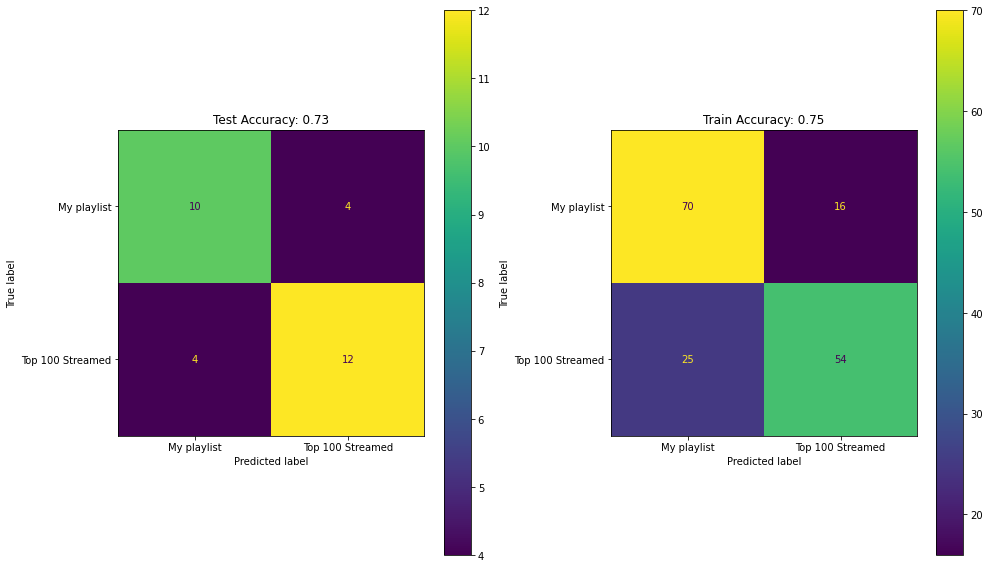

In [395]:
evaluate_binary_model(enet_lr_bayes_search)

### Analysis of coefficients

In [430]:
best_lr_model = enet_lr_bayes_search.best_estimator_.named_steps['logreg']
lr_model_results = pd.DataFrame(best_lr_model.coef_.T, index=enet_lr_bayes_search.feature_names_in_, 
columns = ['Logistic Regression coefficients']) 
lr_model_results['Exp(coefficients)'] = np.exp(lr_model_results['Logistic Regression coefficients'])
lr_model_results.sort_values('Exp(coefficients)', ascending=False, inplace=True)
lr_model_results


Logistic Regression coefficients  Exp(coefficients)
speechiness                               0.495438           1.641217
danceability                              0.356678           1.428576
loudness                                  0.280857           1.324265
acousticness                              0.131987           1.141093
liveness                                  0.029482           1.029921
key                                      -0.064591           0.937451
tempo                                    -0.105883           0.899530
valence                                  -0.121499           0.885592
energy                                   -0.208858           0.811510
instrumentalness                         -0.458670           0.632124

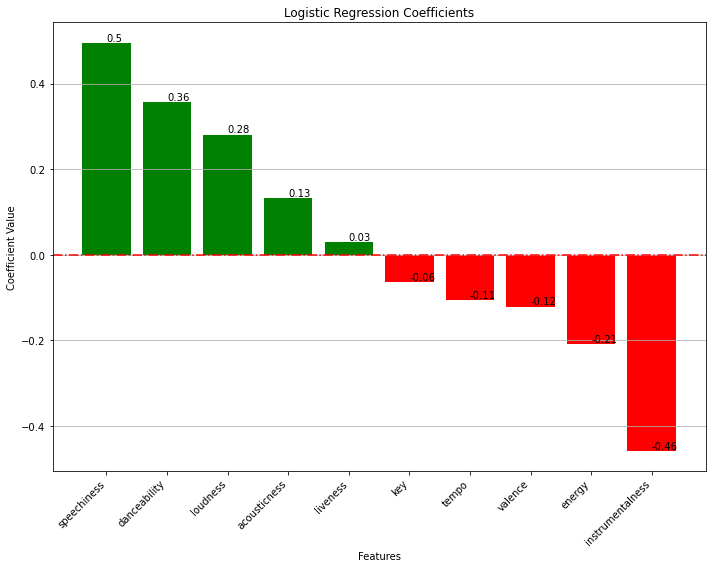

In [449]:
plt.figure(figsize=(10, 8))
bars = plt.bar(lr_model_results.index, lr_model_results['Logistic Regression coefficients'], 
               color=['green' if c > 0 else 'red' for c in lr_model_results['Logistic Regression coefficients']])
plt.axhline(y=0, color='red', linestyle='dashdot')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

## annotate values 
for bar in bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y_val, round(y_val,2), va = 'bottom')

plt.tight_layout()
plt.show()

Evidently, disregarding statistical significance and only looking at averages, we see that the traits that increase the chances of me liking a song are speechiness, dancability, loudness. On the other hand, songs that are high in instrumentalness, energy or valence are less likely to fit my taste. 

### Statistical analysis 

Unfortunately, for us to be able to see if coefficients are statistically significant, and to examine other statistical properties of the model (to see goodness of fit, etc), we need to re-run the model on statsmodels to be able to get R-like results. 

In [477]:
from statsmodels.discrete.discrete_model import Logit

y_binarised = y.map({
    'My playlist':1, 
    'Top 100 Streamed':0
})
# print(y_binarised)

## Fit the model, with regularisation if possible
sm_lr_regularised = Logit(y_binarised, X)
regularised_results = sm_lr_regularised.fit_regularized(method= 'l1')

## See results!
print(regularised_results.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.49413623563714587
            Iterations: 68
            Function evaluations: 72
            Gradient evaluations: 68
                           Logit Regression Results                           
Dep. Variable:                 source   No. Observations:                  195
Model:                          Logit   Df Residuals:                      185
Method:                           MLE   Df Model:                            9
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                  0.2868
Time:                        11:59:43   Log-Likelihood:                -96.357
converged:                       True   LL-Null:                       -135.10
Covariance Type:            nonrobust   LLR p-value:                 5.095e-13
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

In [550]:
sm_results_coeffs = pd.DataFrame([regularised_results.params, regularised_results.pvalues]).T
sm_results_coeffs.columns = ['coeffs', 'pvals']
sm_results_coeffs['abs_coeffs'] = sm_results_coeffs['coeffs'].abs()
sm_results_coeffs_sorted = sm_results_coeffs.sort_values('abs_coeffs', ascending=False)
## add if significant i.e. below 0.05
sm_results_coeffs_sorted['significant'] = sm_results_coeffs_sorted.pvals.apply(lambda p: True if p <=0.05 else False)

In [551]:
sm_results_coeffs_sorted

coeffs     pvals  abs_coeffs  significant
speechiness      -20.317403  0.005740   20.317403         True
danceability      -4.965120  0.000281    4.965120         True
instrumentalness   3.898235  0.004499    3.898235         True
energy             2.367891  0.032885    2.367891         True
valence            1.500685  0.102913    1.500685        False
liveness          -1.064546  0.526018    1.064546        False
acousticness      -0.858871  0.273623    0.858871        False
loudness          -0.216519  0.008073    0.216519         True
key                0.038218  0.442581    0.038218        False
tempo              0.002973  0.618523    0.002973        False

/var/folders/4k/l4b4k90s7mb5fw_d4xc66bym0000gn/T/ipykernel_60638/902315895.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = coef_df.pvals[i]


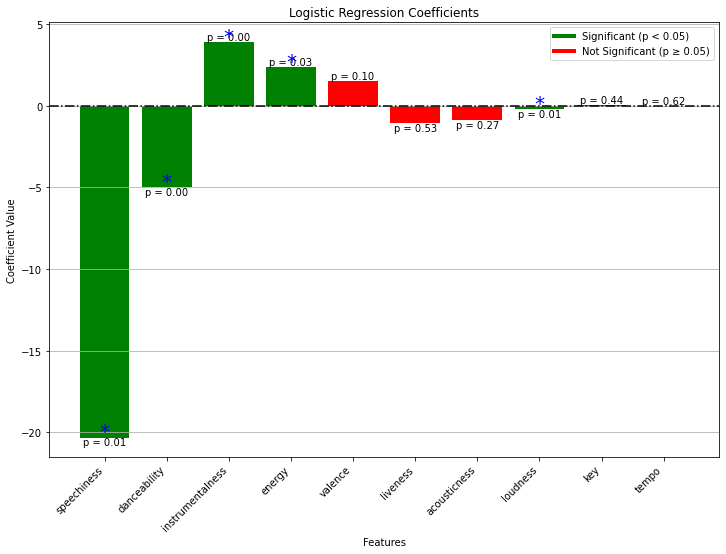

In [531]:
## Plotting 
from matplotlib.lines import Line2D

plt.figure(figsize=(12, 8))
coef_df = sm_results_coeffs_sorted
bars = plt.bar(coef_df.index, coef_df['coeffs'], 
               color=['green' if coef_df.loc[feature, 'significant'] else 'red' for feature in coef_df.index])
plt.axhline(y=0, color='black', linestyle='dashdot')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Add value labels to the bars
for i, bar in enumerate(bars):
    p_val = coef_df.pvals[i]
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'p = {p_val:.2f}', va='bottom' if yval > 0 else 'top', ha='center')

# Adding significance markers
for feature in coef_df.index:
    if coef_df.loc[feature, 'significant']:
        plt.text(coef_df.index.get_loc(feature), coef_df.loc[feature, 'coeffs'], '*', fontsize=20, color='blue', ha='center')
# Create custom legend
legend_handles = [Line2D([0], [0], color='green', lw=4, label='Significant (p < 0.05)'),
                  Line2D([0], [0], color='red', lw=4, label='Not Significant (p ≥ 0.05)')]

plt.legend(handles=legend_handles, loc='upper right')

In [586]:
## error bars for confidence intervals 
sm_results_ci = regularised_results.conf_int(alpha = 0.05)
sm_results_ci.columns = ['lower', 'upper']
sm_results_coeffs_sorted_merged = sm_results_ci.merge(sm_results_coeffs_sorted, left_index=True, right_index=True)

## check
sm_results_coeffs_sorted_merged

lower     upper     coeffs     pvals  abs_coeffs  \
danceability      -7.644202 -2.286039  -4.965120  0.000281    4.965120   
energy             0.192585  4.543197   2.367891  0.032885    2.367891   
key               -0.059335  0.135771   0.038218  0.442581    0.038218   
loudness          -0.376719 -0.056318  -0.216519  0.008073    0.216519   
speechiness      -34.733646 -5.901159 -20.317403  0.005740   20.317403   
acousticness      -2.396521  0.678780  -0.858871  0.273623    0.858871   
instrumentalness   1.208810  6.587661   3.898235  0.004499    3.898235   
liveness          -4.355012  2.225921  -1.064546  0.526018    1.064546   
valence           -0.302798  3.304167   1.500685  0.102913    1.500685   
tempo             -0.008730  0.014677   0.002973  0.618523    0.002973   

                  significant  
danceability             True  
energy                   True  
key                     False  
loudness                 True  
speechiness              True  
acousticness            False  
instrumentalness         True  
liveness                False  
valence                 False  
tempo                   False

Text(0.5, 0.98, 'SM Logistic Regression Coefficient results')

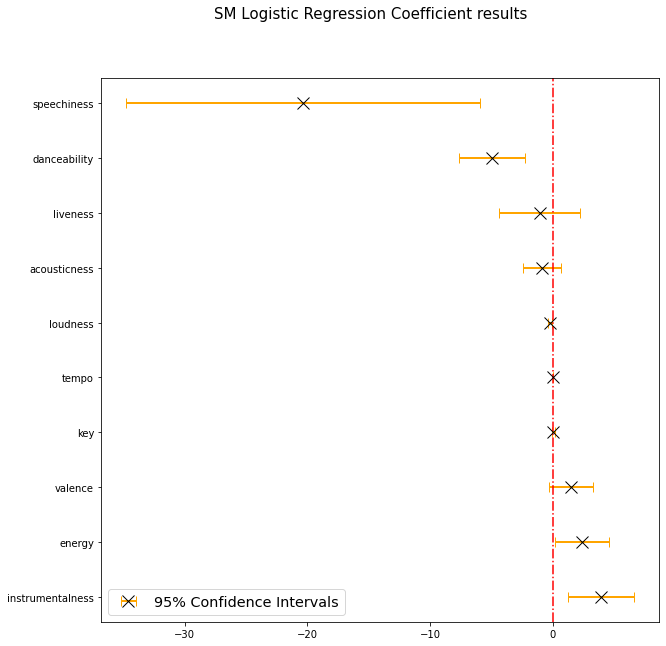

In [621]:
data_temp = sm_results_coeffs_sorted_merged.sort_values(['coeffs', 'pvals'], ascending = False)
plt.figure(figsize=(10,10))
plt.errorbar(data_temp.coeffs, data_temp.index, 
            xerr = data_temp.upper - data_temp.coeffs,
            fmt = 'x', 
            mec = 'black', 
            mfc = 'red', 
            ecolor = 'orange', 
            capsize = 5, ## to add caps at both ends of the error line 
            elinewidth = 2, 
            markersize = 12)
plt.legend(['95% Confidence Intervals'], loc = 'best', fontsize = 'x-large')
plt.axvline(x = 0, linestyle = 'dashdot', color = 'red')
plt.suptitle('SM Logistic Regression Coefficient results', fontsize = 15)


### Model comparisons

In [628]:
svc_results_df = svc_results_df.T
svc_results_df

Model 1 (SVC) Model 2 (PCA -> SVC)
svm__C                19.863895             0.327804
svm__gamma                0.001              0.06225
svm__kernel                 rbf               linear
pca__n_components           NaN                  6.0
best score             0.721212             0.715152
train accuracy         0.745455             0.739394
test accuracy          0.733333             0.766667

In [659]:
m3_train_acc = get_accuracy_scores(enet_lr_bayes_search, x = X_train, y = y_train)
m3_test_acc = get_accuracy_scores(enet_lr_bayes_search, x = X_test, y = y_test)
m3_best_score = enet_lr_bayes_search.best_score_

## temp holder for LR model
temp_holder = pd.DataFrame([m3_best_score, m3_train_acc, m3_test_acc],
                            index = ['best score', 'train accuracy', 'test accuracy'], 
                            columns = ['Model 3 (Ridge Logistic Regression)'])
## add in CV best hyperparams into temp holder too
temp_holder_2 = pd.concat([temp_holder,(pd.DataFrame(enet_lr_bayes_search.best_params_.values(), index=enet_lr_bayes_search.best_params_.keys(), columns=['Model 3 (Ridge Logistic Regression)']))])

## Combine into original comparisons df
model_comparisons_df = pd.concat([svc_results_df.T,temp_holder_2.T])
model_comparisons_df.T

Model 1 (SVC) Model 2 (PCA -> SVC)  \
svm__C                19.863895             0.327804   
svm__gamma                0.001              0.06225   
svm__kernel                 rbf               linear   
pca__n_components           NaN                  6.0   
best score             0.721212             0.715152   
train accuracy         0.745455             0.739394   
test accuracy          0.733333             0.766667   
logreg__C                   NaN                  NaN   
logreg__l1_ratio            NaN                  NaN   

                  Model 3 (Ridge Logistic Regression)  
svm__C                                            NaN  
svm__gamma                                        NaN  
svm__kernel                                       NaN  
pca__n_components                                 NaN  
best score                                   0.739394  
train accuracy                               0.751515  
test accuracy                                0.733333  
logreg__C                                    0.058158  
logreg__l1_ratio                                  0.0

Although close, the Logistic Regression with L2 regularisation has the best score and the second best test score.

## Model: Random Forests 

* Good for high dimensionality and feature selection
* Good for correlated variables
* Good for capturing interactions between variables

In [660]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('rf', RandomForestClassifier())  # Random Forest classifier
])

# Define the parameter space for Bayesian optimization
param_space_rf = {
    'rf__n_estimators': Integer(50, 300),  # Number of trees
    'rf__max_depth': Integer(3, 20),  # Maximum depth of the trees
    'rf__min_samples_split': Integer(2, 20),  # Minimum samples required to split an internal node
    'rf__min_samples_leaf': Integer(1, 20),  # Minimum samples required to be at a leaf node
    'rf__max_features': Categorical(['auto', 'sqrt', 'log2'])  # Number of features to consider at every split
}

# Use BayesSearchCV for cross-validation and hyperparameter tuning
bayes_search_rf = BayesSearchCV(
    estimator=pipeline_rf,  # The pipeline
    search_spaces=param_space_rf,  # The parameter space
    n_iter=32,  # Number of iterations
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=2,  # Verbose output
    random_state=42  # Random state for reproducibility
)

# Fit the model
bayes_search_rf.fit(X_train, y_train)

# Print the best parameters found by BayesSearchCV
print(f"Best Parameters for Random Forest: {bayes_search_rf.best_params_}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings

[CV] END rf__max_depth=10, rf__max_features=log2, rf__min_samples_leaf=19, rf__min_samples_split=8, rf__n_estimators=218; total time=   0.5s
[CV] END rf__max_depth=10, rf__max_features=log2, rf__min_samples_leaf=19, rf__min_samples_split=8, rf__n_estimators=218; total time=   0.5s
[CV] END rf__max_depth=10, rf__max_features=log2, rf__min_samples_leaf=19, rf__min_samples_split=8, rf__n_estimators=218; total time=   0.5s
[CV] END rf__max_depth=10, rf__max_features=log2, rf__min_samples_leaf=19, rf__min_samples_split=8, rf__n_estimators=218; total time=   0.5s
[CV] END rf__max_depth=10, rf__max_features=log2, rf__min_samples_leaf=19, rf__min_samples_split=8, rf__n_estimators=218; total time=   0.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END rf__max_depth=17, rf__max_features=log2, rf__min_samples_leaf=7, rf__min_samples_split=19, rf__n_estimators=266; total time=   0.5s
[CV] END rf__max_depth=17, rf__max_features=log2, rf__min_samples_leaf=7, rf__min_samples_split=19, rf__n_estimators=266; total time=   0.5s
[CV] END rf__max_depth=17, rf__max_features=log2, rf__min_samples_leaf=7, rf__min_samples_split=19, rf__n_estimators=266; total time=   0.5s
[CV] END rf__max_depth=17, rf__max_features=log2, rf__min_samples_leaf=7, rf__min_samples_split=19, rf__n_estimators=266; total time=   0.5s


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


[CV] END rf__max_depth=17, rf__max_features=log2, rf__min_samples_leaf=7, rf__min_samples_split=19, rf__n_estimators=266; total time=   0.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END rf__max_depth=11, rf__max_features=log2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=97; total time=   0.2s
[CV] END rf__max_depth=11, rf__max_features=log2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=97; total time=   0.2s


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END rf__max_depth=11, rf__max_features=log2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=97; total time=   0.2s
[CV] END rf__max_depth=11, rf__max_features=log2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=97; total time=   0.2s


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


[CV] END rf__max_depth=11, rf__max_features=log2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=97; total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END rf__max_depth=17, rf__max_features=auto, rf__min_samples_leaf=12, rf__min_samples_split=16, rf__n_estimators=181; total time=   0.7s
[CV] END rf__max_depth=17, rf__max_features=auto, rf__min_samples_leaf=12, rf__min_samples_split=16, rf__n_estimators=181; total time=   0.7s
[CV] END rf__max_depth=17, rf__max_features=auto, rf__min_samples_leaf=12, rf__min_samples_split=16, rf__n_estimators=181; total time=   0.7s
[CV] END rf__max_depth=17, rf__max_features=auto, rf__min_samples_leaf=12, rf__min_samples_split=16, rf__n_estimators=181; total time=   0.7s


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


[CV] END rf__max_depth=17, rf__max_features=auto, rf__min_samples_leaf=12, rf__min_samples_split=16, rf__n_estimators=181; total time=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END rf__max_depth=17, rf__max_features=sqrt, rf__min_samples_leaf=11, rf__min_samples_split=15, rf__n_estimators=276; total time=   0.6s
[CV] END rf__max_depth=17, rf__max_features=sqrt, rf__min_samples_leaf=11, rf__min_samples_split=15, rf__n_estimators=276; total time=   0.6s
[CV] END rf__max_depth=17, rf__max_features=sqrt, rf__min_samples_leaf=11, rf__min_samples_split=15, rf__n_estimators=276; total time=   0.7s
[CV] END rf__max_depth=17, rf__max_features=sqrt, rf__min_samples_leaf=11, rf__min_samples_split=15, rf__n_estimators=276; total time=   0.7s
[CV] END rf__max_depth=17, rf__max_features=sqrt, rf__min_samples_leaf=11, rf__min_samples_split=15, rf__n_estimators=276; total time=   0.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END rf__max_depth=15, rf_

In [680]:
## best results
pd.DataFrame(bayes_search_rf.best_params_.values(), 
            index = bayes_search_rf.best_params_.keys())



TypeError: 'type' object is not subscriptable